# Swahili News Classification


## Objectives 

* To Develop a Multi-Class Classification Model that utilizes machine learning techniques to categorize Swahili News.
* To Enhance User Experience by improving the accessibility of Swahili news content by enabling automated categorization on online news platforms.
* To Promote Swahili Language by contributing to the representation and preservation of Swahili in digital media by ensuring its inclusion and visibility in online products and services.

## Business Understanding
Swahili serves as a vital language for communication, education, and cultural expression in Tanzania and across East Africa. With the increasing dominance of English in online spaces, there's a risk of losing the representation of Swahili, especially in digital media such as news platforms. We strive to address this challenge by developing a multi-class classification model to automatically categorize Swahili news articles into specific categories. By doing so, online news platforms can enhance user experience by providing readers with easy access to news content relevant to their interests, while also contributing to the preservation and promotion of the Swahili language in the digital age.


## Data Understanding
The dataset comprises 5151 rows of news articles sourced from various outlets in Tanzania and is segmented into five distinct categories: Kitaifa (National), Kimataifa (International), Biashara (Business), Michezo (Sports), and Burudani (Entertainment). Each category represents a specific domain of news coverage, offering a comprehensive view of diverse topics within the Tanzanian media landscape. The dataset source can be accessed for further exploration and analysis via the provided link on [Zindi Africa's platform]( https://zindi.africa/hackathons/swahili-news-classification-challenge/data.).

### Features
The dataset is structured with three main features: 'id', 'content', and 'category'. The 'id' column serves as a unique identifier for each news article, likely facilitating easy referencing and organization. The 'content' feature contains the actual text of the news articles, forming the primary basis for analysis and model training. Finally, the 'category' column acts as the target variable, indicating the specific category or topic to which each news article belongs. The goal to development a predictive model capable of accurately assigning categories to news articles based on their content.

### Target
The target variable, 'category', serves as the cornerstone of supervised machine learning tasks, especially in classification problems. In this context, each news article is labeled with a specific category or topic, such as 'Kitaifa' (National), 'Kimataifa' (International), 'Biashara' (Business), 'Michezo' (Sports), or 'Burudani' (Entertainment). As the central focus of the predictive model, the target variable acts as the class label or outcome that the model endeavors to predict based on the features of the input data. In essence, it encapsulates the essence of the article's content and assigns it to a predefined category. By accurately predicting the category of news articles, the model can assist in various applications like news classification, content recommendation, and topic modeling.

**Importing Libraries**

In [1]:
# 1. pandas for data manipulation and analysis
import pandas as pd

# 2. numpy for numerical operations
import numpy as np

# 3. re for regular expression operations
import re 

# 4. sys for system-specific parameters and functions
import sys

# 5. defaultdict for creating dictionaries with default values
from collections import defaultdict

# 6. nltk for natural language processing tasks
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk import FreqDist

# 7. matplotlib.pyplot for data visualization
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from collections import Counter

# Import the relevant vectorizer class
from sklearn.feature_extraction.text import TfidfVectorizer

# Import relevant class and function
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# 8. seaborn for statistical data visualization
import seaborn as sns

# 9. MaxNLocator for setting maximum number of locators on plots
from matplotlib.ticker import MaxNLocator

# 10. stopwordsiso for accessing stopword lists
import stopwordsiso as stopwords

# 11. string for string operations
import string 

# 12. CountVectorizer for converting text data into a matrix of token counts
from sklearn.feature_extraction.text import CountVectorizer

# 13. Various classification models for building predictive models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier, RidgeClassifier, Lasso, ElasticNet, Ridge, BayesianRidge
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# 14. log_loss and accuracy_score for model evaluation
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix

# 15. TfidfVectorizer for converting text data into a matrix of TF-IDF features
from sklearn.feature_extraction.text import TfidfVectorizer

# 16. hstack for horizontal stacking of sparse matrices
from scipy.sparse import hstack

# 17. joblib for saving and loading models
import joblib

# Suppressing warnings
import warnings
warnings.filterwarnings('ignore')


## 1. Loading and Exploring Data


In [2]:
#load the data
df= pd.read_csv('Train.csv')
# Check the first five rows of train data
print("First five rows of  data:")
df.head()

First five rows of  data:


,id,content,category
0,SW0,SERIKALI imesema haitakuwa tayari kuona amani...,Kitaifa
1,SW1,"Mkuu wa Mkoa wa Tabora, Aggrey Mwanri amesiti...",Biashara
2,SW10,SERIKALI imetoa miezi sita kwa taasisi zote z...,Kitaifa
3,SW100,KAMPUNI ya mchezo wa kubahatisha ya M-bet ime...,michezo
4,SW1000,WATANZANIA wamekumbushwa kusherehekea sikukuu...,Kitaifa


In [3]:
# Check the shape of train data
print("Data Shape:", df.shape)

Data Shape: (5151, 3)


In [4]:
# Check the information of train data
print(" Data Information:")
df.info()

 Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5151 entries, 0 to 5150
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        5151 non-null   object
 1   content   5151 non-null   object
 2   category  5151 non-null   object
dtypes: object(3)
memory usage: 120.9+ KB


In [5]:
# Check the columns of train data
print(" Data Columns:")
df.columns

 Data Columns:


Index(['id', 'content', 'category'], dtype='object')

The dataset comprises 5151 rows, where each row corresponds to a news article. It contains three columns: 'id' serves as a unique identifier, 'content' contains the text of the articles, and 'category' denotes the topic or category of each article. These initial steps of data exploration provide valuable insights into the dataset's composition, facilitating data preprocessing, analysis, and modeling endeavors. 

**Distribution Of Target** 


We start by investing the content in the category column which is our target column

In [6]:
# Print statement to display the unique values in the "category" column
df.target_names = df["category"].unique()
print("Values in 'category' column:", df.target_names)

Values in 'category' column: ['Kitaifa' 'Biashara' 'michezo' 'Kimataifa' 'Burudani']


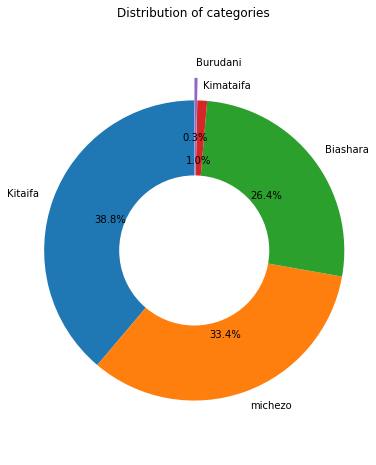

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

# Count the occurrences of each category
category_counts = df["category"].value_counts()

# Create a DataFrame to hold the counts and target names
df_target_counts = pd.DataFrame(category_counts)
df_target_counts["target name"] = df_target_counts.index

# Rename the columns
df_target_counts.columns = ["count", "target name"]
df_target_counts.index.name = "target value"

# Plotting the donut chart
plt.figure(figsize=(6, 8))

# Explode slices for specific categories
explode = (0, 0, 0, 0, 0.15)

# Draw pie chart
plt.pie(df_target_counts['count'], labels=df_target_counts['target name'], autopct='%1.1f%%', startangle=90, explode=explode)

# Draw a white circle at the center to create a donut chart
center_circle = plt.Circle((0, 0), 0.5, color='white', linewidth=0)
plt.gca().add_artist(center_circle)

# Add title and ensure equal aspect ratio
plt.title('Distribution of categories')
plt.axis('equal')

# Show the plot
plt.show()


We know that there are five categories represented. How many are there of each?

In [8]:
# converting string labels to int labels

label_map = {
    'Kitaifa': 0,
    'michezo': 1,
    'Biashara': 2,
    'Kimataifa': 3,
    'Burudani': 4
}


df['label'] = df['category'].map(label_map)
df.head()

,id,content,category,label
0,SW0,SERIKALI imesema haitakuwa tayari kuona amani...,Kitaifa,0
1,SW1,"Mkuu wa Mkoa wa Tabora, Aggrey Mwanri amesiti...",Biashara,2
2,SW10,SERIKALI imetoa miezi sita kwa taasisi zote z...,Kitaifa,0
3,SW100,KAMPUNI ya mchezo wa kubahatisha ya M-bet ime...,michezo,1
4,SW1000,WATANZANIA wamekumbushwa kusherehekea sikukuu...,Kitaifa,0


In this case, the dataset seems to have a varying number of instances across different categories, with "Kitaifa", "michezo", and "Biashara" being the most represented categories, while "Kimataifa" and "Burudani" have fewer instances.. Now let's look at the features.

**Visually Inspecting Features** 

In [9]:
# Set random seed for reproducibility
np.random.seed(42)

# Sample one record for each target value
sampled_records = df.groupby('category', group_keys=False).apply(lambda x: x.sample(1))

# Display the full text and category label of each sampled record
for index, row in sampled_records.iterrows():
    print("Index:", index)
    print("Category:", row['category'])
    print("Full text:")
    print(row['content'])
    print("\n")  # Add a newline for readability

Index: 182
Category: Biashara
Full text:
 Uwezeshaji huo upo katika kuwapatia elimu ya ujasiriamali pamoja na kuwawezesha vitendea kazi vya kisasa ili waweze kufikia ndoto zao.Mikoa iliyofikiwa na Airtel kupitia mradi huo wa jamii ni pamoja na Dar es Salaam, Morogoro, Lindi, Kagera, Manyara na Dodoma.Mkuu wa Mawasiliano wa Airtel, Beatrice Singano alisema mikoa 6 tayari imefaidika na shilingi milioni 125 za mradi wa Airtel Fursa na bado mradi unaendelea.Alisema Airtel kila wiki hutumia Sh milioni 20 kwa ajili ya makundi mawili au vijana wawili watakaojitokeza na kuomba kuwezeshwa na mradi wa Airtel Fursa, alisema Singano.“Awali mwaka huu tulitenga jumla ya Sh bilioni moja kwa ajili ya kuwasaidia vijana wenye umri kati ya miaka 18 hadi 24 kuweza kutumia fursa walizonazo na kujiajiri wao wenyewe pamoja na wengine, sasa pesa hizi zipo na zinawasubiri,“alieleza Singano.Katika siku 90 wamesaidia vijana wanaojishughulisha na biashara au ujasiriamali katika utunzaji wa mazingira, ufugaji, kil

on the above samples we noted that there is a punctuation problem where we dont have space after full-stop, for instance  `...Yanga wakati wangeweza kupata pointi zote tatu.Alisema wachezaji wake...`. This affect counting the number of sentenses in our content column.
To tackle this we create a fuction that adds space where necessary.

In [10]:
# to add space after full-stop punctuation where necessary 
def add_space_after_fullstop(text):
    new_text = ""
    for i, char in enumerate(text):
        if char == '.':
            # Check if the next character is a space or if it's the last character in the text
            if i < len(text) - 1 and text[i + 1] != ' ':
                new_text += char + ' '
            else:
                new_text += char
        else:
            new_text += char
    return new_text

# Apply the function to the content column of the DataFrame and replace the original column
df['content'] = df['content'].apply(add_space_after_fullstop)



## 2. Data Cleaning and Exploratory Data Analysis with nltk

One of the most basic problems seen when working with text data is things like punctuation, capitalization, stopwords and numbers. We perform text cleaning by removing the following; punctuation, capitalization, numbers and stopwords from our content column. 

***Standarizing Case , removing punctuation and numbers***

In [11]:
def text_cleaning(text):
    '''Make text lowercase, remove text in square brackets, remove links, remove punctuation,
    and remove words containing numbers.'''
    # Convert text to lowercase
    text = text.lower()
    # Remove text in square brackets
    text = re.sub(r'\[.*?\]', '', text)
    # Remove links
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove punctuation except for spaces
    text = re.sub(r'[^\w\s]', '', text)
    # Remove words containing numbers
    text = re.sub(r'\w*\d\w*', '', text)
    return text



We apply the above to our dataset 

In [12]:
# Apply text cleaning to the 'content' column of the dataset
df['content_cleaned'] = df['content'].apply(text_cleaning)
sampled_records['content_cleaned'] = sampled_records['content'].apply(text_cleaning)
df.head()

,id,content,category,label,content_cleaned
0,SW0,SERIKALI imesema haitakuwa tayari kuona amani...,Kitaifa,0,serikali imesema haitakuwa tayari kuona amani...
1,SW1,"Mkuu wa Mkoa wa Tabora, Aggrey Mwanri amesiti...",Biashara,2,mkuu wa mkoa wa tabora aggrey mwanri amesitis...
2,SW10,SERIKALI imetoa miezi sita kwa taasisi zote z...,Kitaifa,0,serikali imetoa miezi sita kwa taasisi zote z...
3,SW100,KAMPUNI ya mchezo wa kubahatisha ya M-bet ime...,michezo,1,kampuni ya mchezo wa kubahatisha ya mbet imei...
4,SW1000,WATANZANIA wamekumbushwa kusherehekea sikukuu...,Kitaifa,0,watanzania wamekumbushwa kusherehekea sikukuu...


**Tokenizing**

Now that the case is consistent it's time to convert each document from a single long string into a set of tokens.

In [13]:
# Tokenize the text using NLTK's word_tokenize function
def tokenize_text(text):
    """
    Tokenize the input text into words and punctuation tokens.
    
    Parameters:
    text (str): The input text.
    
    Returns:
    list: List of tokens.
    """
    if isinstance(text, str):
        return word_tokenize(text)
    else:
        return []

# Tokenize the 'content_cleaned' column in the DataFrame
df['tokens'] = df['content_cleaned'].apply(tokenize_text)
sampled_records['tokens'] = sampled_records['content_cleaned'].apply(tokenize_text)
df.head()


,id,content,category,label,content_cleaned,tokens
0,SW0,SERIKALI imesema haitakuwa tayari kuona amani...,Kitaifa,0,serikali imesema haitakuwa tayari kuona amani...,"[serikali, imesema, haitakuwa, tayari, kuona, ..."
1,SW1,"Mkuu wa Mkoa wa Tabora, Aggrey Mwanri amesiti...",Biashara,2,mkuu wa mkoa wa tabora aggrey mwanri amesitis...,"[mkuu, wa, mkoa, wa, tabora, aggrey, mwanri, a..."
2,SW10,SERIKALI imetoa miezi sita kwa taasisi zote z...,Kitaifa,0,serikali imetoa miezi sita kwa taasisi zote z...,"[serikali, imetoa, miezi, sita, kwa, taasisi, ..."
3,SW100,KAMPUNI ya mchezo wa kubahatisha ya M-bet ime...,michezo,1,kampuni ya mchezo wa kubahatisha ya mbet imei...,"[kampuni, ya, mchezo, wa, kubahatisha, ya, mbe..."
4,SW1000,WATANZANIA wamekumbushwa kusherehekea sikukuu...,Kitaifa,0,watanzania wamekumbushwa kusherehekea sikukuu...,"[watanzania, wamekumbushwa, kusherehekea, siku..."


Visualizing one of the row

In [14]:
example_tokens = df.iloc[250]["tokens"][:20]
example_tokens

['utekelezaji',
 'wa',
 'mfumo',
 'huu',
 'unafanyika',
 'kutokana',
 'na',
 'kubainika',
 'kuwa',
 'na',
 'mafanikio',
 'makubwa',
 'baada',
 'ya',
 'majaribio',
 'yake',
 'kufanyika',
 'tangu',
 'julai',
 'mwaka']

Now that our data is clean we can perform EDA to understands words distribution

**Exploratory Data Analysis: Frequency Distributions**

 we use FreqDist from NLTK which allows us to pass in a single list of words, and it produces a dictionary-like output of those words and their frequencies. Then use Matplotlib to visualize the most common words of our content 

In [15]:
example_freq_dist = FreqDist(df.iloc[600]["tokens"][:80])
example_freq_dist

FreqDist({'wa': 4, 'mbunge': 3, 'taabu': 3, 'bunge': 2, 'la': 2, 'tanzania': 2, 'ndugai': 2, 'amesema': 2, 'zitto': 2, 'anampa': 2, ...})

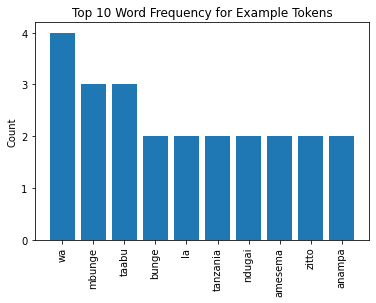

In [16]:
def visualize_top_10(freq_dist, title):

    # Extract data for plotting
    top_10 = list(zip(*freq_dist.most_common(10)))
    tokens = top_10[0]
    counts = top_10[1]

    # Set up plot and plot data
    fig, ax = plt.subplots()
    ax.bar(tokens, counts)

    # Customize plot appearance
    ax.set_title(title)
    ax.set_ylabel("Count")
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.tick_params(axis="x", rotation=90)
    
visualize_top_10(example_freq_dist, "Top 10 Word Frequency for Example Tokens")

In [17]:
df["tokens"].explode()

0         serikali
0          imesema
0        haitakuwa
0           tayari
0            kuona
           ...    
5150            na
5150         hivyo
5150    kuliongeza
5150         taifa
5150        mapato
Name: tokens, Length: 1505392, dtype: object

**Top 10 Word Frequency for Samples**

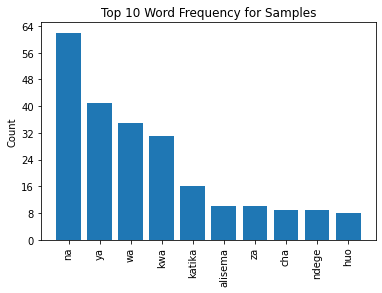

In [18]:
sample_freq_dist = FreqDist(sampled_records["tokens"].explode())
visualize_top_10(sample_freq_dist, "Top 10 Word Frequency for Samples")

**Top 10 word frequency for our dataset**

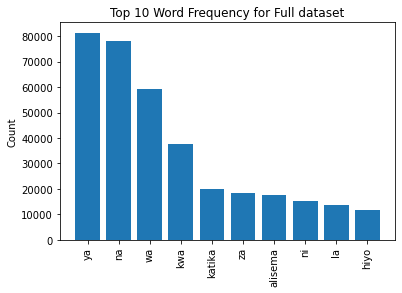

In [19]:
# Create a frequency distribution for X_train
df_freq_dist = FreqDist(df["tokens"].explode())

# Plot the top 10 tokens
visualize_top_10(df_freq_dist, "Top 10 Word Frequency for Full dataset")

word frequencies in our dataset `'ya'` has highest frequency.
We can also subdivide this by category, to see if it makes a difference:

**Category Text Distribution**


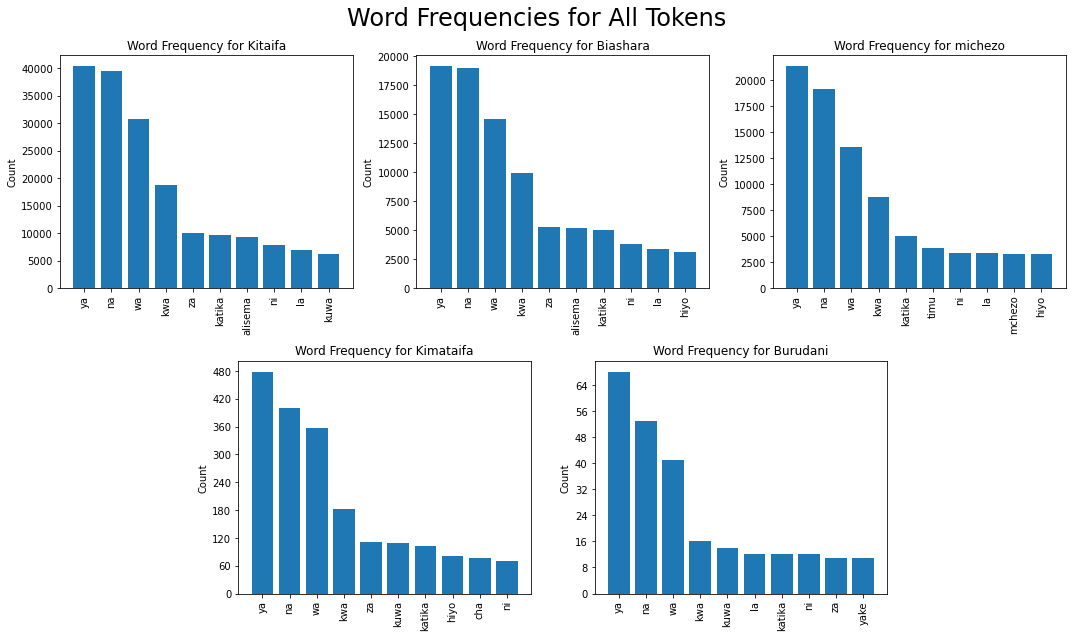

In [20]:
def setup_five_subplots():
    """
    It's hard to make an odd number of graphs pretty with just nrows
    and ncols, so we make a custom grid. See example for more details:
    https://matplotlib.org/stable/gallery/subplots_axes_and_figures/gridspec_multicolumn.html

    We want the graphs to look like this:
     [ ] [ ] [ ]
       [ ] [ ]

    So we make a 2x6 grid with 5 graphs arranged on it. 3 in the
    top row, 2 in the second row

      0 1 2 3 4 5
    0|[|]|[|]|[|]|
    1| |[|]|[|]| |
    """
    fig = plt.figure(figsize=(15, 9))
    fig.set_tight_layout(True)
    gs = fig.add_gridspec(2, 6)
    ax1 = fig.add_subplot(gs[0, :2])  # row 0, cols 0-1
    ax2 = fig.add_subplot(gs[0, 2:4])  # row 0, cols 2-3
    ax3 = fig.add_subplot(gs[0, 4:])  # row 0, cols 4-5
    ax4 = fig.add_subplot(gs[1, 1:3])  # row 1, cols 1-2
    ax5 = fig.add_subplot(gs[1, 3:5])  # row 1, cols 3-4
    return fig, [ax1, ax2, ax3, ax4, ax5]

def plot_distribution_of_column_by_category(column, axes, title="Word Frequency for"):
    for index, category in enumerate(df.target_names):
        # Filter the dataset for the current category
        category_data = df[df["category"] == category][column]
        
        # Count the occurrences of words in this category
        word_counts = Counter(category_data.explode())
        
        if len(word_counts) > 0:  # Check if there are words to plot
            # Get the top 10 most common words and their counts
            top_10 = word_counts.most_common(10)
            tokens, counts = zip(*top_10)

            # Set up plot
            ax = axes[index]
            ax.bar(tokens, counts)

            # Customize plot appearance
            ax.set_title(f"{title} {category}")
            ax.set_ylabel("Count")
            ax.yaxis.set_major_locator(MaxNLocator(integer=True))
            ax.tick_params(axis="x", rotation=90)
        else:
            # If there are no words in this category, skip plotting
            print(f"No words found for category: {category}")

# Call the function to set up subplots
fig, axes = setup_five_subplots()

# Now you can populate each subplot with your category text distributions
plot_distribution_of_column_by_category("tokens", axes)

# Add a title to the whole figure
fig.suptitle("Word Frequencies for All Tokens", fontsize=24)

# Show the plot
plt.show()


we note that words with high frequency are more likely to have less meaning on our dataset for instance `kwa`, `ya`, `wa` ...

## 3. Baseline Model with TfidfVectorizer and MultinomialNB

We model by constructing a model that essentially only has access to the information depicted in the plots above. Therefore, we utilize the default token pattern to split the full text into tokens and employ a limited vocabulary. To provide the model with slightly more information using the same features, we employ a TfidfVectorizer. This vectorizer not only counts the term frequency (tf) within a single document but also incorporates the inverse document frequency (idf) — indicating how rare the term is.

We import the vectorizer, instantiate a vectorizer object, and fit it on our dataset.

**Baseline Model Without Balance** 

In [21]:
# Create a TfidfVectorizer instance without any balancing
tf_without_balancing = TfidfVectorizer()

# Fit the TfidfVectorizer to the 'text' column of the DataFrame and transform the text data into a TF-IDF matrix
X_tf_wob = tf_without_balancing.fit_transform(df['content'])

# Convert the sparse TF-IDF matrix into a dense NumPy array
X_tf_wob = X_tf_wob.toarray()


In [22]:
# Print the shape of the TF-IDF matrix
print(X_tf_wob.shape)

# Print the TF-IDF matrix itself
print(X_tf_wob)


(5151, 74251)
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.07356504 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [23]:
# Instantiate a vectorizer with max_features=10
# (we are using the default token pattern)
tfidf = TfidfVectorizer(max_features=10)

# Fit the vectorizer on X_train["content"] and transform it
X_vectorized_wob= tfidf.fit_transform(df["content"])

# Visually inspect the vectorized data
#pd.DataFrame.sparse.from_spmatrix(X_vectorized_wob, columns=tfidf.get_feature_names_out())
# Convert the sparse TF-IDF matrix into a dense NumPy array
X_vectorized_wob = X_vectorized_wob.toarray()


In [24]:
# Print the shape of the TF-IDF matrix
print(X_vectorized_wob.shape)

# Print the TF-IDF matrix itself
print(X_vectorized_wob)


(5151, 10)
[[0.         0.05608631 0.14950797 ... 0.45078184 0.67591033 0.15971745]
 [0.         0.         0.         ... 0.86291722 0.25370068 0.17984823]
 [0.25155442 0.03089035 0.16468735 ... 0.64551399 0.3970852  0.29322231]
 ...
 [0.13445173 0.05283323 0.18778175 ... 0.25478155 0.72160087 0.07522681]
 [0.11057933 0.05431562 0.09652526 ... 0.30558523 0.65457134 0.3093501 ]
 [0.30446254 0.0427284  0.1139001  ... 0.54947275 0.44627333 0.12167802]]


In [25]:
# splitting dataset
X_train_vectorized_wob, X_test_vectorized_wob, y_train_vectorized_wob, y_test_vectorized_wob = train_test_split(X_vectorized_wob, df['label'].values, test_size=0.2)

In [26]:
# Instantiate a MultinomialNB classifier
baseline_model = MultinomialNB()

# Evaluate the classifier on X_train_vectorized_wob and y_train_vectorized_wob
baseline_cv_wob = cross_val_score(baseline_model, X_train_vectorized_wob, y_train_vectorized_wob)
baseline_cv_wob

array([0.39199029, 0.39441748, 0.39320388, 0.39684466, 0.38713592])

In [27]:
baseline_cv_wob.mean()

0.3927184466019417

The baseline performance of the Multinomial Naive Bayes classifier, evaluated using cross-validation, yields an average accuracy of approximately 39.2%. This indicates that the classifier's predictive ability is slightly better than random chance. However, it's essential to consider the class balance within the dataset, as it significantly influences the interpretation of the results. 

## 4.  Preprocessing and Feature Engineering 

To effectively mitigate the effects of class imbalance in our dataset and improve the performance of the predictive model, we apply Oversampling technique which  Increase the number of instances in the minority class by generating synthetic samples or duplicating existing ones.

**RandomOverSampler**

In [28]:
# Importing the Counter class from the collections module
from collections import Counter

# Importing the RandomOverSampler class from the imbalanced-learn library
from imblearn.over_sampling import RandomOverSampler


In [29]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['content'], df['label'].values, test_size=0.25)


In [30]:
Counter(y_train)

Counter({1: 1287, 0: 1509, 2: 1015, 4: 13, 3: 39})

In [80]:
# Creating a TF-IDF vectorizer
vectorizer = TfidfVectorizer()
vectorizer.fit(X_train)


TfidfVectorizer()

In [32]:
X_train_tf = vectorizer.transform(X_train)

In [33]:
# Convert TF-IDF matrix to a dense array
X_train_tf = X_train_tf.toarray()

# Get the shape of the TF-IDF matrix
X_train_tf.shape


(3863, 63348)

In [34]:
# Transform the test data into TF-IDF features using the fitted vectorizer
X_test_tf = vectorizer.transform(X_test)

# Convert TF-IDF matrix to a dense array
X_test_tf = X_test_tf.toarray()


In [35]:
# Determine the desired number of samples for each class
desired_samples_per_class = {
    0: 1509,  
    1: 1509,  
    2: 1509,  
    3: 1509,  
    4: 1509  
}

# Create a RandomOverSampler instance with a sampling strategy as a dictionary
overSampler = RandomOverSampler(sampling_strategy=desired_samples_per_class)

# Resample the training data to address class imbalance
X_train_os, y_train_os = overSampler.fit_resample(X_train_tf, y_train)


In [36]:
Counter(y_train_os)

Counter({1: 1509, 0: 1509, 2: 1509, 4: 1509, 3: 1509})

After applying RandomOverSampler we managed to balance our dataset and this boost our prediction.
Now we work on checking stop words 

**Removing Stopwords**

In general, we assume that stopwords do not contain useful information, but that is not always the case.  we have seen earlier that stop words are common accross all categories which makes it hard for us to distinguish categories.

Now that NLTK does not provide a built-in corpus for Swahili stopwords, and the one thats there not sufficient for us to apply on our swahili text. we created our own list of Swahili stopwords and named it `sw_stopwords` from an external source.  

In [37]:
sw_stpwrds = stopwords.stopwords("sw")  # swahili stopwords
print (len(sw_stpwrds))

74


In [38]:
sw_stopwords=["akasema","alikuwa","alisema","baada","basi","bila","cha","chini","hadi",
              "hapo","hata","hivyo","hiyo","huku","huo","ili","ilikuwa","juu","kama","karibu",
              "katika","kila","kima","kisha","kubwa","kutoka","kuwa","kwa","kwamba","kwenda","kwenye","la","lakini",
              "mara","mdogo","mimi","mkubwa","mmoja","moja","muda","mwenye","na","naye","ndani","ng","ni","nini",
              "nonkungu","pamoja","pia","sana","sasa","sauti","tafadhali","tena","tu","vile","wa",
              "wakati","wake","walikuwa","wao","watu","wengine","wote","ya","yake","yangu","yao","yeye","yule","za",
              "zaidi","zake","na","ya","wa","kwa","ni","za","katika","la","kuwa","kama","kwamba","cha","hiyo","lakini","yake","hata","wakati",
              "hivyo","sasa","wake","au","watu","hii","zaidi","vya","huo","tu","kwenye","si","pia","ili","moja","kila","baada","ambao","ambayo","yao","wao","kuna",
              "hilo","kutoka","kubwa","pamoja","bila","huu","hayo","sana","ndani","mkuu","hizo","kufanya","wengi","hadi","mmoja","hili","juu","kwanza","wetu","kuhusu",
              "baadhi","wote","yetu","hivi","kweli","mara","wengine","nini","ndiyo","zao","kati","hao","hapa","kutokana","muda","habari","ambaye","wenye","nyingine","hakuna",
              "tena","hatua","bado","nafasi","basi","kabisa","hicho","nje","huyo","vile","yote","mkubwa","alikuwa","zote","leo","haya","huko","kutoa","mwa","kiasi","hasa","nyingi","kabla","wale","chini","gani","hapo","lazima","mwingine","bali","huku","zake","ilikuwa",
              "tofauti","kupata","mbalimbali","pale","kusema","badala","wazi","yeye","alisema","hawa",
              "ndio","hizi","tayari","wala","muhimu","ile","mpya","ambazo","dhidi","kwenda","sisi","kwani",
              "jinsi","binafsi","kutumia","mbili","mbali","kuu","mengine","mbele","namna","mengi","upande","na","lakini","ingawa"
              "ingawaje","kwa","sababu","hadi","hata","kama","ambapo","ambamo","ambako","ambacho","ambao","ambaye","ilhali","ya","yake","yao","yangu","yetu","yenu","vya","vyao","vyake","vyangu",
"vyenu","vyetu","yako","yao","hizo","yenu","mimi","sisi","wewe","nyinyi","yeye","wao","nao","nasi","nanyi","ni","alikuwa","atakuwa","hii","hizi","zile",
"ile","hivi","vile","za","zake","zao","zenu","kwenye","katika","kwa","kwao","kwenu","kwetu","dhidi","kati","miongoni","katikati","wakati","kabla","baada",
"baadaye","nje","tena","mbali","halafu","hapa","pale","mara","mara","yoyote","wowote","chochote","vyovyote","yeyote","lolote","mwenye","mwenyewe","lenyewe",
"lenye","wote","lote","vyote","nyote","kila","zaidi","hapana","ndiyo","au","ama","ama","sio","siye","tu","budi","nyingi","nyingine","wengine","mwingine",
"zingine","lingine","kingine","chote","sasa","basi","bila","cha","chini","hapo","pale","huku","kule","humu","hivyo","hivyohivyo","vivyo","palepale","fauka",
"hiyo","hiyohiyo","zile","zilezile","hao","haohao","huku","hukuhuku","humuhumu","huko","hukohuko","huo","huohuo","hili","hilihili","ilikuwa","juu","karibu",
"kila","kima","kisha","kutoka","kwenda","kubwa","ndogo","kwamba","kuwa","la","lao","lo","mara","na",
"mdogo","mkubwa","ng’o","pia","aidha","vile","vilevile","kadhalika","halikadhalika","ni","sana","pamoja","pamoja","tafadhali","tena",
"wa","wake","wao",
"ya","yule","wale","zangu","nje","afanaleki","salale","oyee","yupi","ipi","lipi","ngapi","yetu","si","angali","wangali","loo","la","ohoo",
"barabara","oyee",
"ewaa","walahi","masalale","duu","toba","mh","kumbe","ala","ebo","haraka","pole","polepole","harakaharaka","hiyo","hivyo","vyovyote",
"atakuwa","itakuwa","mtakuwa",
"tutakuwa","labda","yumkini","haiyumkini","yapata","takribani","hususani","yawezekana","nani","juu""chini",
"ndani","baadhi","kuliko","vile","mwa","kwa","hasha","hivyo","moja","kisha",
"pili","kwanza","ili","je","jinsi","ila","ila","nini","hasa","huu","zako","mimi","nchini", "nchi", "serikali", "tanzania", "mwaka"
]

In [39]:
def remove_stopwords(token_list):
    """
    Given a list of tokens, return a list where the tokens
    that are also present in stopwords_list have been
    removed
    """
    stopwords_removed = [token for token in token_list if token not in sw_stopwords]
    return stopwords_removed


In [40]:
tokens_example = df.iloc[100]["tokens"]
print("Length with stopwords:", len(tokens_example))


tokens_example_without_stopwords = remove_stopwords(tokens_example)
print("Length without stopwords:", len(tokens_example_without_stopwords))


Length with stopwords: 279
Length without stopwords: 142


In [41]:
df["text_without_stopwords"] = df["tokens"].apply(remove_stopwords)
df.head()

,id,content,category,label,content_cleaned,tokens,text_without_stopwords
0,SW0,SERIKALI imesema haitakuwa tayari kuona amani...,Kitaifa,0,serikali imesema haitakuwa tayari kuona amani...,"[serikali, imesema, haitakuwa, tayari, kuona, ...","[imesema, haitakuwa, kuona, amani, utulivu, in..."
1,SW1,"Mkuu wa Mkoa wa Tabora, Aggrey Mwanri amesiti...",Biashara,2,mkuu wa mkoa wa tabora aggrey mwanri amesitis...,"[mkuu, wa, mkoa, wa, tabora, aggrey, mwanri, a...","[mkoa, tabora, aggrey, mwanri, amesitisha, lik..."
2,SW10,SERIKALI imetoa miezi sita kwa taasisi zote z...,Kitaifa,0,serikali imetoa miezi sita kwa taasisi zote z...,"[serikali, imetoa, miezi, sita, kwa, taasisi, ...","[imetoa, miezi, sita, taasisi, umma, hazitumii..."
3,SW100,KAMPUNI ya mchezo wa kubahatisha ya M-bet ime...,michezo,1,kampuni ya mchezo wa kubahatisha ya mbet imei...,"[kampuni, ya, mchezo, wa, kubahatisha, ya, mbe...","[kampuni, mchezo, kubahatisha, mbet, imeingia,..."
4,SW1000,WATANZANIA wamekumbushwa kusherehekea sikukuu...,Kitaifa,0,watanzania wamekumbushwa kusherehekea sikukuu...,"[watanzania, wamekumbushwa, kusherehekea, siku...","[watanzania, wamekumbushwa, kusherehekea, siku..."


**Word Frequencies without Stopwords** 

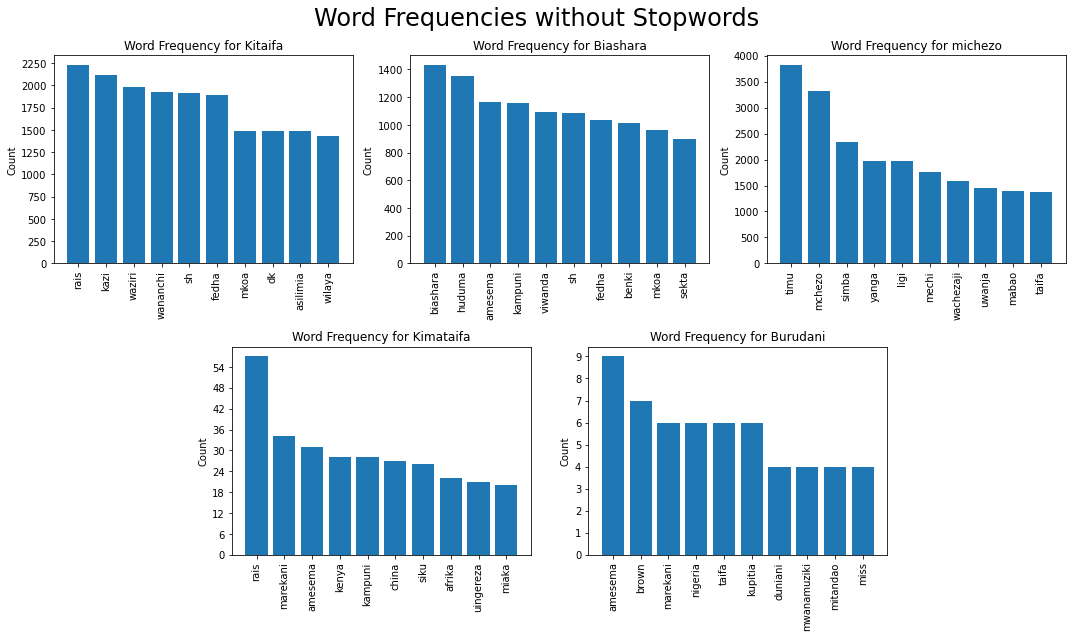

In [42]:
#apply stopwords to dataset
df["text_without_stopwords"] = df["tokens"].apply(remove_stopwords)
fig, axes = setup_five_subplots()
plot_distribution_of_column_by_category("text_without_stopwords", axes)
fig.suptitle("Word Frequencies without Stopwords", fontsize=24);

The most common words differ significantly between categories, meaning that hopefully our model will have an easier time distinguishing between them.

we can check model performance after removing stopwords, when instantiating the vectorizer:

**Model performance Without stopwords**

In [43]:
# Instantiate the vectorizer
tfidf = TfidfVectorizer(
    max_features=10,
    stop_words = sw_stopwords
)

# Fit the vectorizer on X_train["text"] and transform it
train_vectorized = tfidf.fit_transform(df["content"])

# Visually inspect the vectorized data
pd.DataFrame.sparse.from_spmatrix(train_vectorized, columns=tfidf.get_feature_names_out())

,amesema,fedha,jana,kazi,mchezo,rais,sh,taifa,timu,waziri
0,0.830190,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.557481
1,0.444628,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.895716
2,0.000000,0.980602,0.130100,0.146604,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
3,0.000000,0.146096,0.116298,0.000000,0.658416,0.000000,0.154661,0.000000,0.71253,0.000000
4,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
...,...,...,...,...,...,...,...,...,...,...
5146,0.000000,0.000000,0.275463,0.155204,0.000000,0.933083,0.000000,0.000000,0.00000,0.171431
5147,0.000000,0.240139,0.191160,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.951731
5148,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000
5149,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000


In [44]:
# Evaluate the classifier on X_train_vectorized and y_train
no_stopwords_cv = cross_val_score(baseline_model, X_train_os, y_train_os)
no_stopwords_cv

array([0.89794566, 0.92776673, 0.89065606, 0.91782638, 0.91915176])

we noted that when balancing categories our model perform explary good with  mean cross-validated accuracy score of about 0.91 

In [45]:
# Instantiate the vectorizer without stopwords
tfidf_no_stopwords = TfidfVectorizer(max_features=10, stop_words=sw_stopwords)

# Fit the vectorizer on X_train["content"] and transform it
train_vectorized_no_stopwords = tfidf_no_stopwords.fit_transform(df["content"])

# Evaluate the classifier on X_train_vectorized and y_train
no_stopwords_cv = cross_val_score(baseline_model, train_vectorized_no_stopwords, df['label'].values)

In [46]:
print("Baseline model without balance :         ", baseline_cv_wob.mean())
print("Stopwords removed and category balanced:", no_stopwords_cv.mean())

Baseline model without balance :          0.3927184466019417
Stopwords removed and category balanced: 0.626092680308495


The second baseline model, which entailed removing stopwords and balancing categories, yielded a substantially higher mean cross-validated accuracy score of about 0.626. Through the elimination of stopwords, common words that may not significantly contribute to the classification task were removed, potentially enhancing the model's performance.

**Domain-Tailored Feature Engineering.**

Here we  check on content distribution per category

In [48]:
from nltk.tokenize import sent_tokenize

# Tokenize the content into sentences
sent_tokenize(df.iloc[500]["content"])

[' TAASISI ya Kuzuia na Kupambana na Rushwa (TAKUKURU), Mkoa wa Ilala inawashikilia watu watatu akiwamo mmiliki wa Kampuni ya Motrax, Chandulal Ladwa kwa tuhuma za kutoa rushwa ya Sh200,000.',
 'Mtuhumiwa huyo alitoa rushwa kwa wakili wa Chama Cha Mapinduzi (CCM), Goodluck Mwangomango ili ampe upendeleo kwenye kikao cha kujadili marejeo ya mikataba ya miradi ya chama hicho.',
 'Mkuu wa Takukuru Mkoa wa Ilala, Christopher Myava aliwaambia waandishi wa habari jijini Dar es Salaam jana kuwa Mei 29, mwaka huu, saa 4 asubuhi, maeneo ya Sea View Upanga kwenye mgahawa wa Central Park, Ladwa ambaye ni mpangaji wa maeneo ya biashara ya CCM alitoa kiasi hicho ili apewe upendeleo kwenye kikao cha kufanya marejeo ya mikataba.',
 'Alisema mtuhumiwa alifikishwa mahakamani jana chini ya Kifungu cha 15 (1), (b) cha Sheria ya Takukuru Na.',
 '11/2007 ili kujibu tuhuma hizo.',
 'Alisema CCM wanaendelea kufanya uhakiki wa mali zote za chama ikiwa ni agizo la Rais John Magufuli ambaye ni Mwenyekiti wa cha

In [49]:
len(sent_tokenize(df.iloc[500]["content"]))

11

In [50]:
df["num_sentences"] = df["content"].apply(lambda x: len(sent_tokenize(x)))

**Distributions of Sentence Counts by Category**

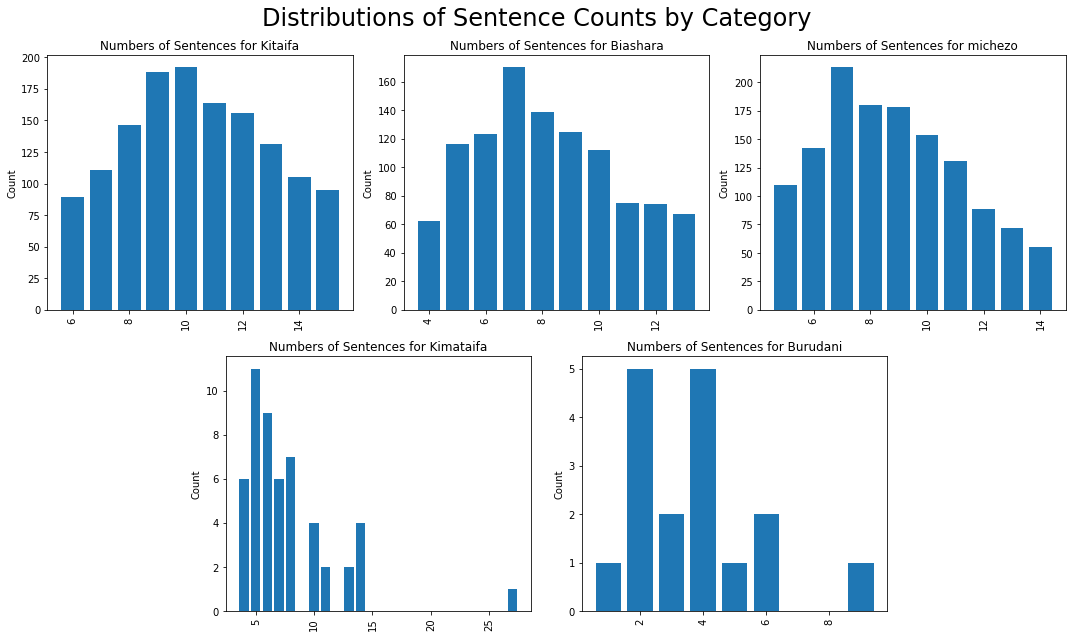

In [51]:
fig, axes = setup_five_subplots()
plot_distribution_of_column_by_category("num_sentences", axes, "Numbers of Sentences for")
fig.suptitle("Distributions of Sentence Counts by Category", fontsize=24);

We find that our model has a good distribution in content when it comes to 'kitaifa', 'biashara', and 'michezo'. However, this might also treat the class with skewed content distribution as a rare class, which could affect our predictions.

### 5. Final Model on the Test Set


###### Model Comparison 

In [53]:
len(X_train)

3863

We allow our model to consider the TF-IDF scores of the top 3000 most frequent tokens. Allowing it to consider all possible tokens could lead to high dimensionality issues, especially if we have more rows than columns. However, there is a significant gap between 10 and the length of X_train features.

In [55]:
# List of models to use
models = [
    {"model": LogisticRegression(), "name": "Logistic Regression"},
    {"model": DecisionTreeClassifier(), "name": "Decision Tree Classifier"},
    {"model": RandomForestClassifier(), "name": "RandomForestClassifier"},
    {"model": MultinomialNB(), "name": "MultinomialNB"},
    {"model": XGBClassifier(), "name": "XGBClassifier"},
    {"model": LGBMClassifier(), "name": "LGBMClassifier"},
    {"model": CatBoostClassifier(), "name": "CatBoostClassifier"}
]

# Initialize an empty list to store results
results = []

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['content'], df['label'].values, test_size=0.25)

# Convert text data to TF-IDF features
vectorizer = TfidfVectorizer(max_features=3000)
X_train_tf = vectorizer.fit_transform(X_train)
X_test_tf = vectorizer.transform(X_test)

# Resample the training data to address class imbalance
overSampler = RandomOverSampler(sampling_strategy='auto')
X_train_os, y_train_os = overSampler.fit_resample(X_train_tf, y_train)

# Iterate through the list of models
for model_entry in models:
    model = model_entry['model']
    model_name = model_entry['name']
    
    # Fit the model to the resampled training data
    model.fit(X_train_os, y_train_os)
    
    # Make predictions on the test data
    y_pred = model.predict(X_test_tf)
    y_pred_proba = model.predict_proba(X_test_tf)
    
    # Calculate accuracy and log loss
    accuracy = accuracy_score(y_test, y_pred)
    log_loss_score = log_loss(y_test, y_pred_proba)
    
    # Append results to the list
    results.append({'Model': model_name, 'Accuracy': accuracy, 'Log Loss': log_loss_score})

# Convert the list of results to a DataFrame
df_models = pd.DataFrame(results)



[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.176822 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 166603
[LightGBM] [Info] Number of data points in the train set: 7550, number of used features: 2946
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Learning rate set to 0.08772
0:	learn: 1.4630337	total: 1.76s	remaining: 29m 16s
1:	learn: 1.3476129	total: 3.42s	remaining: 28m 28s
2:	learn: 1.2557556	total: 5.04s	remaining: 27m 55s
3:	learn: 1.1862931	total: 6.62s	remaining: 27m 28s
4:	learn: 1.1266362	total: 8.17s	remaining: 27m 5s
5:	learn: 1

140:	learn: 0.2663028	total: 3m 23s	remaining: 20m 38s
141:	learn: 0.2657421	total: 3m 24s	remaining: 20m 36s
142:	learn: 0.2650630	total: 3m 26s	remaining: 20m 35s
143:	learn: 0.2640593	total: 3m 27s	remaining: 20m 33s
144:	learn: 0.2637246	total: 3m 28s	remaining: 20m 31s
145:	learn: 0.2628795	total: 3m 30s	remaining: 20m 29s
146:	learn: 0.2619410	total: 3m 31s	remaining: 20m 28s
147:	learn: 0.2612783	total: 3m 33s	remaining: 20m 26s
148:	learn: 0.2606276	total: 3m 34s	remaining: 20m 24s
149:	learn: 0.2600730	total: 3m 35s	remaining: 20m 23s
150:	learn: 0.2589824	total: 3m 37s	remaining: 20m 21s
151:	learn: 0.2579253	total: 3m 38s	remaining: 20m 19s
152:	learn: 0.2568613	total: 3m 40s	remaining: 20m 18s
153:	learn: 0.2558986	total: 3m 41s	remaining: 20m 16s
154:	learn: 0.2554571	total: 3m 42s	remaining: 20m 14s
155:	learn: 0.2547977	total: 3m 44s	remaining: 20m 13s
156:	learn: 0.2547400	total: 3m 45s	remaining: 20m 11s
157:	learn: 0.2539037	total: 3m 47s	remaining: 20m 9s
158:	learn:

291:	learn: 0.2043850	total: 6m 56s	remaining: 16m 50s
292:	learn: 0.2042765	total: 6m 58s	remaining: 16m 48s
293:	learn: 0.2041480	total: 6m 59s	remaining: 16m 47s
294:	learn: 0.2036302	total: 7m	remaining: 16m 45s
295:	learn: 0.2035049	total: 7m 2s	remaining: 16m 44s
296:	learn: 0.2032985	total: 7m 3s	remaining: 16m 42s
297:	learn: 0.2030010	total: 7m 5s	remaining: 16m 41s
298:	learn: 0.2024187	total: 7m 6s	remaining: 16m 39s
299:	learn: 0.2022439	total: 7m 7s	remaining: 16m 38s
300:	learn: 0.2011156	total: 7m 9s	remaining: 16m 36s
301:	learn: 0.2010133	total: 7m 10s	remaining: 16m 35s
302:	learn: 0.2008307	total: 7m 12s	remaining: 16m 33s
303:	learn: 0.2006730	total: 7m 13s	remaining: 16m 32s
304:	learn: 0.2005835	total: 7m 14s	remaining: 16m 30s
305:	learn: 0.2004933	total: 7m 16s	remaining: 16m 29s
306:	learn: 0.2004237	total: 7m 17s	remaining: 16m 27s
307:	learn: 0.2001195	total: 7m 19s	remaining: 16m 26s
308:	learn: 0.1999732	total: 7m 20s	remaining: 16m 25s
309:	learn: 0.199779

441:	learn: 0.1733751	total: 10m 27s	remaining: 13m 12s
442:	learn: 0.1733445	total: 10m 28s	remaining: 13m 10s
443:	learn: 0.1731547	total: 10m 30s	remaining: 13m 9s
444:	learn: 0.1729388	total: 10m 31s	remaining: 13m 7s
445:	learn: 0.1727678	total: 10m 33s	remaining: 13m 6s
446:	learn: 0.1724597	total: 10m 34s	remaining: 13m 5s
447:	learn: 0.1723431	total: 10m 36s	remaining: 13m 3s
448:	learn: 0.1723037	total: 10m 37s	remaining: 13m 2s
449:	learn: 0.1721018	total: 10m 38s	remaining: 13m
450:	learn: 0.1719566	total: 10m 40s	remaining: 12m 59s
451:	learn: 0.1719173	total: 10m 41s	remaining: 12m 57s
452:	learn: 0.1717445	total: 10m 42s	remaining: 12m 56s
453:	learn: 0.1715465	total: 10m 44s	remaining: 12m 54s
454:	learn: 0.1714841	total: 10m 45s	remaining: 12m 53s
455:	learn: 0.1714546	total: 10m 47s	remaining: 12m 52s
456:	learn: 0.1714268	total: 10m 48s	remaining: 12m 50s
457:	learn: 0.1713819	total: 10m 49s	remaining: 12m 49s
458:	learn: 0.1711860	total: 10m 51s	remaining: 12m 47s
45

589:	learn: 0.1542419	total: 13m 58s	remaining: 9m 42s
590:	learn: 0.1540984	total: 13m 59s	remaining: 9m 41s
591:	learn: 0.1538591	total: 14m 1s	remaining: 9m 39s
592:	learn: 0.1537125	total: 14m 2s	remaining: 9m 38s
593:	learn: 0.1536330	total: 14m 4s	remaining: 9m 37s
594:	learn: 0.1536025	total: 14m 5s	remaining: 9m 35s
595:	learn: 0.1535708	total: 14m 6s	remaining: 9m 34s
596:	learn: 0.1533116	total: 14m 8s	remaining: 9m 32s
597:	learn: 0.1530451	total: 14m 9s	remaining: 9m 31s
598:	learn: 0.1530012	total: 14m 11s	remaining: 9m 29s
599:	learn: 0.1528219	total: 14m 12s	remaining: 9m 28s
600:	learn: 0.1527149	total: 14m 14s	remaining: 9m 27s
601:	learn: 0.1525324	total: 14m 15s	remaining: 9m 25s
602:	learn: 0.1523449	total: 14m 16s	remaining: 9m 24s
603:	learn: 0.1520899	total: 14m 18s	remaining: 9m 22s
604:	learn: 0.1520568	total: 14m 19s	remaining: 9m 21s
605:	learn: 0.1520161	total: 14m 21s	remaining: 9m 19s
606:	learn: 0.1518640	total: 14m 22s	remaining: 9m 18s
607:	learn: 0.151

740:	learn: 0.1391158	total: 17m 30s	remaining: 6m 7s
741:	learn: 0.1390598	total: 17m 31s	remaining: 6m 5s
742:	learn: 0.1390030	total: 17m 33s	remaining: 6m 4s
743:	learn: 0.1389541	total: 17m 34s	remaining: 6m 2s
744:	learn: 0.1386941	total: 17m 35s	remaining: 6m 1s
745:	learn: 0.1385248	total: 17m 37s	remaining: 5m 59s
746:	learn: 0.1384882	total: 17m 38s	remaining: 5m 58s
747:	learn: 0.1382782	total: 17m 40s	remaining: 5m 57s
748:	learn: 0.1382463	total: 17m 41s	remaining: 5m 55s
749:	learn: 0.1382078	total: 17m 42s	remaining: 5m 54s
750:	learn: 0.1381810	total: 17m 44s	remaining: 5m 52s
751:	learn: 0.1380725	total: 17m 45s	remaining: 5m 51s
752:	learn: 0.1380488	total: 17m 47s	remaining: 5m 50s
753:	learn: 0.1378493	total: 17m 48s	remaining: 5m 48s
754:	learn: 0.1378342	total: 17m 49s	remaining: 5m 47s
755:	learn: 0.1375917	total: 17m 51s	remaining: 5m 45s
756:	learn: 0.1375595	total: 17m 52s	remaining: 5m 44s
757:	learn: 0.1375363	total: 17m 54s	remaining: 5m 42s
758:	learn: 0.1

891:	learn: 0.1261877	total: 21m 3s	remaining: 2m 32s
892:	learn: 0.1261629	total: 21m 4s	remaining: 2m 31s
893:	learn: 0.1260853	total: 21m 6s	remaining: 2m 30s
894:	learn: 0.1260313	total: 21m 7s	remaining: 2m 28s
895:	learn: 0.1259821	total: 21m 8s	remaining: 2m 27s
896:	learn: 0.1259541	total: 21m 10s	remaining: 2m 25s
897:	learn: 0.1259318	total: 21m 11s	remaining: 2m 24s
898:	learn: 0.1258907	total: 21m 13s	remaining: 2m 23s
899:	learn: 0.1257417	total: 21m 14s	remaining: 2m 21s
900:	learn: 0.1255268	total: 21m 15s	remaining: 2m 20s
901:	learn: 0.1253162	total: 21m 17s	remaining: 2m 18s
902:	learn: 0.1252948	total: 21m 18s	remaining: 2m 17s
903:	learn: 0.1252053	total: 21m 20s	remaining: 2m 15s
904:	learn: 0.1251878	total: 21m 21s	remaining: 2m 14s
905:	learn: 0.1250953	total: 21m 22s	remaining: 2m 13s
906:	learn: 0.1249587	total: 21m 24s	remaining: 2m 11s
907:	learn: 0.1249364	total: 21m 25s	remaining: 2m 10s
908:	learn: 0.1247921	total: 21m 27s	remaining: 2m 8s
909:	learn: 0.12

In [56]:
df_models

,Model,Accuracy,Log Loss
0,Logistic Regression,0.836957,0.438784
1,Decision Tree Classifier,0.712733,10.354155
2,RandomForestClassifier,0.840839,0.575659
3,MultinomialNB,0.821429,0.482447
4,XGBClassifier,0.856366,0.457004
5,LGBMClassifier,0.858696,0.464706
6,CatBoostClassifier,0.847826,0.420255


 **visualizing models performance , accuracy and log loss**

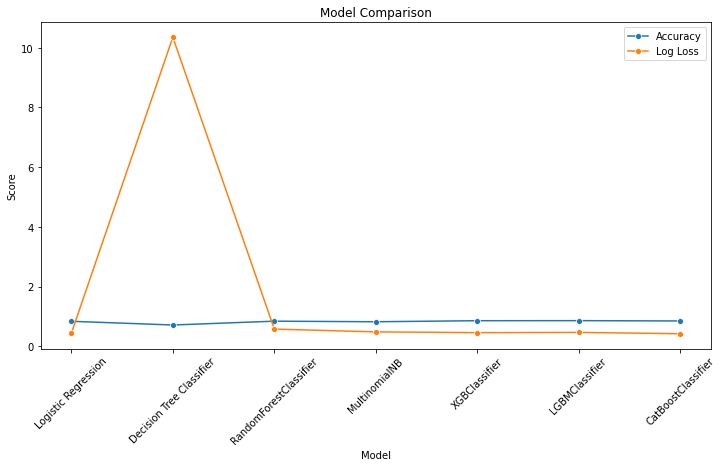

In [57]:
#plot the results for both accuracy and log loss
plt.figure(figsize=(12,6))
sns.lineplot(data=df_models, x='Model', y='Accuracy', marker='o', label='Accuracy')
sns.lineplot(data=df_models, x='Model', y='Log Loss', marker='o', label='Log Loss')
plt.title('Model Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()



Accuracy: The accuracy of the model on the test data, measuring the proportion of correctly classified instances. Log Loss: The logarithmic loss (log loss) of the model on the test data, assessing the performance of a classification model where the prediction output is a probability value between 0 and 1. According to the results, the LGBMClassifier achieved the highest accuracy of 0.859, closely followed by the CatBoostClassifier with an accuracy of 0.848. However, considering both accuracy and log loss, it's noteworthy that the CatBoostClassifier attained the lowest log loss of 0.420 among all models.

Hence, based on both accuracy and log loss, the CatBoostClassifier appears to have performed the best in this scenario.

 **Final Model with CatBoostClassifier, LogisticRegression and LGBMClassifier**

In [58]:

# Function to display confusion matrix
def display_confusion_matrix(model, X_test, y_test):
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

# Initialize LGBMClassifier, CatBoostClassifier and LogisticRegression models
nb_model = MultinomialNB()
catboost_model = CatBoostClassifier()
logistic_model = LogisticRegression()

# Fit the models to the resampled training data
nb_model.fit(X_train_os, y_train_os)
catboost_model.fit(X_train_os, y_train_os)
logistic_model.fit(X_train_os, y_train_os)



Learning rate set to 0.08772
0:	learn: 1.4630337	total: 1.73s	remaining: 28m 44s
1:	learn: 1.3476129	total: 3.42s	remaining: 28m 25s
2:	learn: 1.2557556	total: 5.05s	remaining: 27m 57s
3:	learn: 1.1862931	total: 6.64s	remaining: 27m 33s
4:	learn: 1.1266362	total: 8.17s	remaining: 27m 6s
5:	learn: 1.0730113	total: 9.72s	remaining: 26m 50s
6:	learn: 1.0205905	total: 11.2s	remaining: 26m 26s
7:	learn: 0.9752850	total: 12.7s	remaining: 26m 14s
8:	learn: 0.9364239	total: 14.2s	remaining: 26m 1s
9:	learn: 0.9041564	total: 15.7s	remaining: 25m 53s
10:	learn: 0.8704441	total: 17.2s	remaining: 25m 46s
11:	learn: 0.8424083	total: 18.7s	remaining: 25m 36s
12:	learn: 0.8160746	total: 20.1s	remaining: 25m 25s
13:	learn: 0.7878550	total: 21.6s	remaining: 25m 21s
14:	learn: 0.7673943	total: 23s	remaining: 25m 12s
15:	learn: 0.7486596	total: 24.5s	remaining: 25m 6s
16:	learn: 0.7307105	total: 25.9s	remaining: 24m 59s
17:	learn: 0.7117470	total: 27.4s	remaining: 24m 55s
18:	learn: 0.6967172	total: 28.9

153:	learn: 0.2558986	total: 3m 40s	remaining: 20m 13s
154:	learn: 0.2554571	total: 3m 42s	remaining: 20m 11s
155:	learn: 0.2547977	total: 3m 43s	remaining: 20m 10s
156:	learn: 0.2547400	total: 3m 45s	remaining: 20m 8s
157:	learn: 0.2539037	total: 3m 46s	remaining: 20m 6s
158:	learn: 0.2538098	total: 3m 47s	remaining: 20m 4s
159:	learn: 0.2533288	total: 3m 49s	remaining: 20m 3s
160:	learn: 0.2525394	total: 3m 50s	remaining: 20m 1s
161:	learn: 0.2520027	total: 3m 51s	remaining: 19m 59s
162:	learn: 0.2517139	total: 3m 53s	remaining: 19m 58s
163:	learn: 0.2508788	total: 3m 54s	remaining: 19m 56s
164:	learn: 0.2503337	total: 3m 56s	remaining: 19m 54s
165:	learn: 0.2499133	total: 3m 57s	remaining: 19m 53s
166:	learn: 0.2493921	total: 3m 58s	remaining: 19m 51s
167:	learn: 0.2487579	total: 4m	remaining: 19m 50s
168:	learn: 0.2485579	total: 4m 1s	remaining: 19m 48s
169:	learn: 0.2476048	total: 4m 3s	remaining: 19m 47s
170:	learn: 0.2473508	total: 4m 4s	remaining: 19m 45s
171:	learn: 0.2464761	

304:	learn: 0.2005835	total: 7m 11s	remaining: 16m 23s
305:	learn: 0.2004933	total: 7m 13s	remaining: 16m 22s
306:	learn: 0.2004237	total: 7m 14s	remaining: 16m 20s
307:	learn: 0.2001195	total: 7m 15s	remaining: 16m 19s
308:	learn: 0.1999732	total: 7m 17s	remaining: 16m 17s
309:	learn: 0.1997799	total: 7m 18s	remaining: 16m 16s
310:	learn: 0.1997369	total: 7m 20s	remaining: 16m 14s
311:	learn: 0.1994201	total: 7m 21s	remaining: 16m 13s
312:	learn: 0.1992033	total: 7m 22s	remaining: 16m 11s
313:	learn: 0.1986265	total: 7m 24s	remaining: 16m 10s
314:	learn: 0.1982973	total: 7m 25s	remaining: 16m 9s
315:	learn: 0.1982486	total: 7m 26s	remaining: 16m 7s
316:	learn: 0.1981962	total: 7m 28s	remaining: 16m 6s
317:	learn: 0.1979750	total: 7m 29s	remaining: 16m 4s
318:	learn: 0.1979212	total: 7m 31s	remaining: 16m 3s
319:	learn: 0.1978372	total: 7m 32s	remaining: 16m 1s
320:	learn: 0.1977626	total: 7m 33s	remaining: 16m
321:	learn: 0.1973535	total: 7m 35s	remaining: 15m 58s
322:	learn: 0.197285

454:	learn: 0.1714841	total: 10m 42s	remaining: 12m 49s
455:	learn: 0.1714546	total: 10m 43s	remaining: 12m 47s
456:	learn: 0.1714268	total: 10m 44s	remaining: 12m 46s
457:	learn: 0.1713819	total: 10m 46s	remaining: 12m 44s
458:	learn: 0.1711860	total: 10m 47s	remaining: 12m 43s
459:	learn: 0.1708732	total: 10m 49s	remaining: 12m 41s
460:	learn: 0.1708044	total: 10m 50s	remaining: 12m 40s
461:	learn: 0.1707638	total: 10m 51s	remaining: 12m 39s
462:	learn: 0.1704411	total: 10m 53s	remaining: 12m 37s
463:	learn: 0.1704012	total: 10m 54s	remaining: 12m 36s
464:	learn: 0.1701060	total: 10m 56s	remaining: 12m 34s
465:	learn: 0.1700724	total: 10m 57s	remaining: 12m 33s
466:	learn: 0.1700029	total: 10m 58s	remaining: 12m 31s
467:	learn: 0.1699759	total: 11m	remaining: 12m 30s
468:	learn: 0.1699447	total: 11m 1s	remaining: 12m 29s
469:	learn: 0.1699001	total: 11m 3s	remaining: 12m 27s
470:	learn: 0.1697673	total: 11m 4s	remaining: 12m 26s
471:	learn: 0.1697179	total: 11m 5s	remaining: 12m 24s


602:	learn: 0.1523449	total: 14m 8s	remaining: 9m 18s
603:	learn: 0.1520899	total: 14m 9s	remaining: 9m 17s
604:	learn: 0.1520568	total: 14m 11s	remaining: 9m 15s
605:	learn: 0.1520161	total: 14m 12s	remaining: 9m 14s
606:	learn: 0.1518640	total: 14m 13s	remaining: 9m 12s
607:	learn: 0.1518336	total: 14m 15s	remaining: 9m 11s
608:	learn: 0.1517992	total: 14m 16s	remaining: 9m 10s
609:	learn: 0.1516054	total: 14m 18s	remaining: 9m 8s
610:	learn: 0.1515601	total: 14m 19s	remaining: 9m 7s
611:	learn: 0.1515282	total: 14m 20s	remaining: 9m 5s
612:	learn: 0.1513990	total: 14m 22s	remaining: 9m 4s
613:	learn: 0.1513782	total: 14m 23s	remaining: 9m 2s
614:	learn: 0.1511491	total: 14m 24s	remaining: 9m 1s
615:	learn: 0.1511175	total: 14m 26s	remaining: 9m
616:	learn: 0.1510276	total: 14m 27s	remaining: 8m 58s
617:	learn: 0.1508817	total: 14m 29s	remaining: 8m 57s
618:	learn: 0.1507632	total: 14m 30s	remaining: 8m 55s
619:	learn: 0.1507372	total: 14m 31s	remaining: 8m 54s
620:	learn: 0.1505785	

753:	learn: 0.1378493	total: 17m 38s	remaining: 5m 45s
754:	learn: 0.1378342	total: 17m 39s	remaining: 5m 43s
755:	learn: 0.1375917	total: 17m 41s	remaining: 5m 42s
756:	learn: 0.1375595	total: 17m 42s	remaining: 5m 41s
757:	learn: 0.1375363	total: 17m 44s	remaining: 5m 39s
758:	learn: 0.1373707	total: 17m 45s	remaining: 5m 38s
759:	learn: 0.1372707	total: 17m 46s	remaining: 5m 36s
760:	learn: 0.1372154	total: 17m 48s	remaining: 5m 35s
761:	learn: 0.1371840	total: 17m 49s	remaining: 5m 34s
762:	learn: 0.1371476	total: 17m 50s	remaining: 5m 32s
763:	learn: 0.1370798	total: 17m 52s	remaining: 5m 31s
764:	learn: 0.1370536	total: 17m 53s	remaining: 5m 29s
765:	learn: 0.1370258	total: 17m 55s	remaining: 5m 28s
766:	learn: 0.1369823	total: 17m 56s	remaining: 5m 27s
767:	learn: 0.1368774	total: 17m 57s	remaining: 5m 25s
768:	learn: 0.1368359	total: 17m 59s	remaining: 5m 24s
769:	learn: 0.1367571	total: 18m	remaining: 5m 22s
770:	learn: 0.1364629	total: 18m 2s	remaining: 5m 21s
771:	learn: 0.1

903:	learn: 0.1252053	total: 21m 31s	remaining: 2m 17s
904:	learn: 0.1251878	total: 21m 32s	remaining: 2m 15s
905:	learn: 0.1250953	total: 21m 34s	remaining: 2m 14s
906:	learn: 0.1249587	total: 21m 35s	remaining: 2m 12s
907:	learn: 0.1249364	total: 21m 37s	remaining: 2m 11s
908:	learn: 0.1247921	total: 21m 38s	remaining: 2m 10s
909:	learn: 0.1247637	total: 21m 40s	remaining: 2m 8s
910:	learn: 0.1246816	total: 21m 41s	remaining: 2m 7s
911:	learn: 0.1246663	total: 21m 43s	remaining: 2m 5s
912:	learn: 0.1244264	total: 21m 44s	remaining: 2m 4s
913:	learn: 0.1243710	total: 21m 46s	remaining: 2m 2s
914:	learn: 0.1242598	total: 21m 48s	remaining: 2m 1s
915:	learn: 0.1242025	total: 21m 50s	remaining: 2m
916:	learn: 0.1241780	total: 21m 52s	remaining: 1m 58s
917:	learn: 0.1241031	total: 21m 54s	remaining: 1m 57s
918:	learn: 0.1240840	total: 21m 56s	remaining: 1m 56s
919:	learn: 0.1239973	total: 21m 58s	remaining: 1m 54s
920:	learn: 0.1239579	total: 22m	remaining: 1m 53s
921:	learn: 0.1239110	to

LogisticRegression()

Confusion Matrix for LogisticRegression:


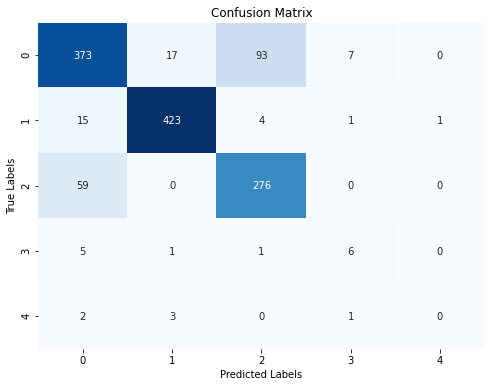

Confusion Matrix for MultinomialNB:


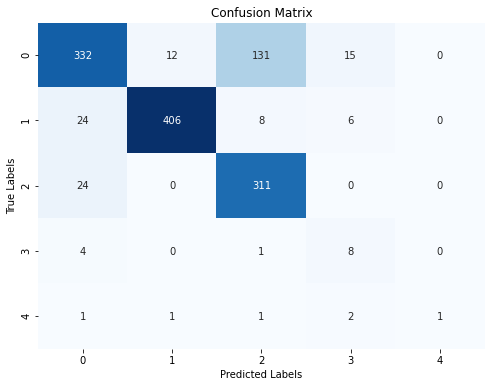

Confusion Matrix for CatBoostClassifier:


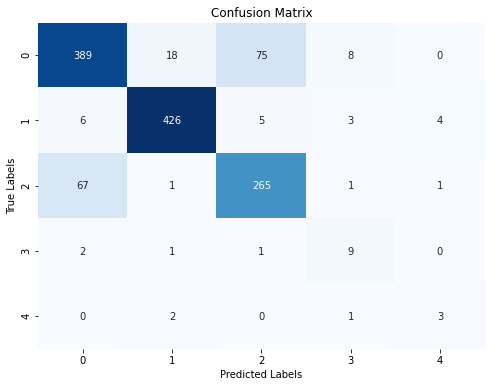

In [59]:
# Display confusion matrix for LGBMClassifier
print("Confusion Matrix for LogisticRegression:")
display_confusion_matrix(logistic_model, X_test_tf, y_test)

print("Confusion Matrix for MultinomialNB:")
display_confusion_matrix(nb_model, X_test_tf, y_test)

# Display confusion matrix for CatBoostClassifier
print("Confusion Matrix for CatBoostClassifier:")
display_confusion_matrix(catboost_model, X_test_tf, y_test)


Examining the confusion matrices across the three classifications, we observe varying degrees of mislabeled posts. Specifically, MultinomialNB shows the highest number of mislabeled posts at 131, followed by 93 in LogisticRegression, and finally, 75 under CatBoostClassifier. This indicates disparities in the models' abilities to accurately classify instances, with MultinomialNB exhibiting the greatest challenge in correctly labeling posts.

In [79]:
from sklearn.metrics import classification_report

# Function to compute evaluation metrics and return as DataFrame
def compute_metrics(model, X_test, y_test):
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Compute classification report
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Extract evaluation metrics
    metrics = {
        "Precision": report['weighted avg']['precision'],
        "Recall": report['weighted avg']['recall'],
        "F1-Score": report['weighted avg']['f1-score'],
        "Accuracy": report['accuracy']
    }
    
    # Convert metrics to DataFrame
    metrics_df = pd.DataFrame.from_dict(metrics, orient='index', columns=['Value'])
    
    return metrics_df

In [76]:
# Compute evaluation metrics for CatBoostClassifier
logistic_metrics = compute_metrics(logistic_model, X_test_tf, y_test)
print("\nEvaluation Metrics for logisticRegression:")
logistic_metrics


Evaluation Metrics for logisticRegression:


,Value
Precision,0.836954
Recall,0.836957
F1-Score,0.835880
Accuracy,0.836957


In [77]:
# Compute evaluation metrics for LGBMClassifier
nb_metrics = compute_metrics(nb_model, X_test_tf, y_test)
print("Evaluation Metrics for MultinomialNB:")
nb_metrics

Evaluation Metrics for MultinomialNB:


,Value
Precision,0.848309
Recall,0.821429
F1-Score,0.823609
Accuracy,0.821429


In [78]:
# Compute evaluation metrics for CatBoostClassifier
catboost_metrics = compute_metrics(catboost_model, X_test_tf, y_test)
print("\nEvaluation Metrics for CatBoostClassifier:")
catboost_metrics


Evaluation Metrics for CatBoostClassifier:


,Value
Precision,0.851815
Recall,0.847826
F1-Score,0.849121
Accuracy,0.847826


The observed range of evaluation metrics across the three selected classifiers highlights varying strengths and weaknesses in their performance. While MultinomialNB exhibits a lower recall, indicating potential limitations in capturing all positive instances, CatBoostClassifier stands out with its high precision, showcasing its proficiency in making accurate positive predictions while minimizing false positives. 

**StackingClassifier**

This code is aimed at implementing a technique called "stacking" for ensemble learning. Stacking is a method that combines multiple classification or regression models via a meta-classifier or meta-regressor. The basic idea is to use the predictions of base models as input features to a higher-level model.

In [62]:
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import classification_report

# Initialize models with the provided datasets
nb_model = MultinomialNB()
catboost_model = CatBoostClassifier()
logistic_model = LogisticRegression()

# Fit the models to the resampled training data
nb_model.fit(X_train_os, y_train_os)
catboost_model.fit(X_train_os, y_train_os)
logistic_model.fit(X_train_os, y_train_os)

# Ensemble using stacking
estimators = [
    ('catboost', catboost_model),
    ('logistic', logistic_model),
    ('nb', nb_model)
]

# Create StackingClassifier instance
stacking = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(), cv=3)
stacking.fit(X_train_os, y_train_os)

# Make predictions
y_pred = stacking.predict(X_test_tf)
y_pred_proba = stacking.predict_proba(X_test_tf)

# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
log_loss_score = log_loss(y_test, y_pred_proba)



Learning rate set to 0.08772
0:	learn: 1.4630337	total: 1.95s	remaining: 32m 25s
1:	learn: 1.3476129	total: 3.67s	remaining: 30m 31s
2:	learn: 1.2557556	total: 5.31s	remaining: 29m 25s
3:	learn: 1.1862931	total: 6.91s	remaining: 28m 41s
4:	learn: 1.1266362	total: 8.47s	remaining: 28m 5s
5:	learn: 1.0730113	total: 9.98s	remaining: 27m 34s
6:	learn: 1.0205905	total: 11.5s	remaining: 27m 7s
7:	learn: 0.9752850	total: 12.9s	remaining: 26m 44s
8:	learn: 0.9364239	total: 14.4s	remaining: 26m 29s
9:	learn: 0.9041564	total: 16s	remaining: 26m 20s
10:	learn: 0.8704441	total: 17.6s	remaining: 26m 23s
11:	learn: 0.8424083	total: 19.1s	remaining: 26m 14s
12:	learn: 0.8160746	total: 20.6s	remaining: 26m 3s
13:	learn: 0.7878550	total: 22.2s	remaining: 26m 5s
14:	learn: 0.7673943	total: 23.7s	remaining: 25m 58s
15:	learn: 0.7486596	total: 25.2s	remaining: 25m 50s
16:	learn: 0.7307105	total: 26.8s	remaining: 25m 47s
17:	learn: 0.7117470	total: 28.3s	remaining: 25m 45s
18:	learn: 0.6967172	total: 29.7s

153:	learn: 0.2558986	total: 3m 41s	remaining: 20m 17s
154:	learn: 0.2554571	total: 3m 43s	remaining: 20m 15s
155:	learn: 0.2547977	total: 3m 44s	remaining: 20m 14s
156:	learn: 0.2547400	total: 3m 45s	remaining: 20m 12s
157:	learn: 0.2539037	total: 3m 47s	remaining: 20m 10s
158:	learn: 0.2538098	total: 3m 48s	remaining: 20m 8s
159:	learn: 0.2533288	total: 3m 49s	remaining: 20m 7s
160:	learn: 0.2525394	total: 3m 51s	remaining: 20m 5s
161:	learn: 0.2520027	total: 3m 52s	remaining: 20m 3s
162:	learn: 0.2517139	total: 3m 54s	remaining: 20m 2s
163:	learn: 0.2508788	total: 3m 55s	remaining: 20m
164:	learn: 0.2503337	total: 3m 56s	remaining: 19m 58s
165:	learn: 0.2499133	total: 3m 58s	remaining: 19m 57s
166:	learn: 0.2493921	total: 3m 59s	remaining: 19m 55s
167:	learn: 0.2487579	total: 4m 1s	remaining: 19m 53s
168:	learn: 0.2485579	total: 4m 2s	remaining: 19m 53s
169:	learn: 0.2476048	total: 4m 4s	remaining: 19m 52s
170:	learn: 0.2473508	total: 4m 5s	remaining: 19m 51s
171:	learn: 0.2464761	t

304:	learn: 0.2005835	total: 7m 13s	remaining: 16m 28s
305:	learn: 0.2004933	total: 7m 15s	remaining: 16m 26s
306:	learn: 0.2004237	total: 7m 16s	remaining: 16m 25s
307:	learn: 0.2001195	total: 7m 17s	remaining: 16m 23s
308:	learn: 0.1999732	total: 7m 19s	remaining: 16m 22s
309:	learn: 0.1997799	total: 7m 20s	remaining: 16m 20s
310:	learn: 0.1997369	total: 7m 21s	remaining: 16m 19s
311:	learn: 0.1994201	total: 7m 23s	remaining: 16m 17s
312:	learn: 0.1992033	total: 7m 24s	remaining: 16m 16s
313:	learn: 0.1986265	total: 7m 26s	remaining: 16m 14s
314:	learn: 0.1982973	total: 7m 27s	remaining: 16m 13s
315:	learn: 0.1982486	total: 7m 28s	remaining: 16m 11s
316:	learn: 0.1981962	total: 7m 30s	remaining: 16m 10s
317:	learn: 0.1979750	total: 7m 31s	remaining: 16m 8s
318:	learn: 0.1979212	total: 7m 33s	remaining: 16m 7s
319:	learn: 0.1978372	total: 7m 34s	remaining: 16m 5s
320:	learn: 0.1977626	total: 7m 35s	remaining: 16m 4s
321:	learn: 0.1973535	total: 7m 37s	remaining: 16m 2s
322:	learn: 0.1

454:	learn: 0.1714841	total: 10m 45s	remaining: 12m 52s
455:	learn: 0.1714546	total: 10m 46s	remaining: 12m 51s
456:	learn: 0.1714268	total: 10m 47s	remaining: 12m 49s
457:	learn: 0.1713819	total: 10m 49s	remaining: 12m 48s
458:	learn: 0.1711860	total: 10m 50s	remaining: 12m 46s
459:	learn: 0.1708732	total: 10m 51s	remaining: 12m 45s
460:	learn: 0.1708044	total: 10m 53s	remaining: 12m 43s
461:	learn: 0.1707638	total: 10m 54s	remaining: 12m 42s
462:	learn: 0.1704411	total: 10m 56s	remaining: 12m 41s
463:	learn: 0.1704012	total: 10m 57s	remaining: 12m 39s
464:	learn: 0.1701060	total: 10m 58s	remaining: 12m 38s
465:	learn: 0.1700724	total: 11m	remaining: 12m 36s
466:	learn: 0.1700029	total: 11m 1s	remaining: 12m 35s
467:	learn: 0.1699759	total: 11m 3s	remaining: 12m 33s
468:	learn: 0.1699447	total: 11m 4s	remaining: 12m 32s
469:	learn: 0.1699001	total: 11m 5s	remaining: 12m 30s
470:	learn: 0.1697673	total: 11m 7s	remaining: 12m 29s
471:	learn: 0.1697179	total: 11m 8s	remaining: 12m 28s
47

602:	learn: 0.1523449	total: 14m 12s	remaining: 9m 21s
603:	learn: 0.1520899	total: 14m 14s	remaining: 9m 20s
604:	learn: 0.1520568	total: 14m 15s	remaining: 9m 18s
605:	learn: 0.1520161	total: 14m 17s	remaining: 9m 17s
606:	learn: 0.1518640	total: 14m 18s	remaining: 9m 15s
607:	learn: 0.1518336	total: 14m 19s	remaining: 9m 14s
608:	learn: 0.1517992	total: 14m 21s	remaining: 9m 12s
609:	learn: 0.1516054	total: 14m 22s	remaining: 9m 11s
610:	learn: 0.1515601	total: 14m 24s	remaining: 9m 10s
611:	learn: 0.1515282	total: 14m 25s	remaining: 9m 8s
612:	learn: 0.1513990	total: 14m 26s	remaining: 9m 7s
613:	learn: 0.1513782	total: 14m 28s	remaining: 9m 5s
614:	learn: 0.1511491	total: 14m 29s	remaining: 9m 4s
615:	learn: 0.1511175	total: 14m 31s	remaining: 9m 2s
616:	learn: 0.1510276	total: 14m 32s	remaining: 9m 1s
617:	learn: 0.1508817	total: 14m 33s	remaining: 9m
618:	learn: 0.1507632	total: 14m 35s	remaining: 8m 58s
619:	learn: 0.1507372	total: 14m 36s	remaining: 8m 57s
620:	learn: 0.150578

753:	learn: 0.1378493	total: 17m 52s	remaining: 5m 49s
754:	learn: 0.1378342	total: 17m 53s	remaining: 5m 48s
755:	learn: 0.1375917	total: 17m 54s	remaining: 5m 46s
756:	learn: 0.1375595	total: 17m 56s	remaining: 5m 45s
757:	learn: 0.1375363	total: 17m 57s	remaining: 5m 44s
758:	learn: 0.1373707	total: 17m 59s	remaining: 5m 42s
759:	learn: 0.1372707	total: 18m	remaining: 5m 41s
760:	learn: 0.1372154	total: 18m 1s	remaining: 5m 39s
761:	learn: 0.1371840	total: 18m 3s	remaining: 5m 38s
762:	learn: 0.1371476	total: 18m 4s	remaining: 5m 36s
763:	learn: 0.1370798	total: 18m 6s	remaining: 5m 35s
764:	learn: 0.1370536	total: 18m 7s	remaining: 5m 34s
765:	learn: 0.1370258	total: 18m 8s	remaining: 5m 32s
766:	learn: 0.1369823	total: 18m 10s	remaining: 5m 31s
767:	learn: 0.1368774	total: 18m 11s	remaining: 5m 29s
768:	learn: 0.1368359	total: 18m 13s	remaining: 5m 28s
769:	learn: 0.1367571	total: 18m 14s	remaining: 5m 26s
770:	learn: 0.1364629	total: 18m 15s	remaining: 5m 25s
771:	learn: 0.136346

904:	learn: 0.1251878	total: 21m 22s	remaining: 2m 14s
905:	learn: 0.1250953	total: 21m 23s	remaining: 2m 13s
906:	learn: 0.1249587	total: 21m 25s	remaining: 2m 11s
907:	learn: 0.1249364	total: 21m 26s	remaining: 2m 10s
908:	learn: 0.1247921	total: 21m 28s	remaining: 2m 8s
909:	learn: 0.1247637	total: 21m 29s	remaining: 2m 7s
910:	learn: 0.1246816	total: 21m 31s	remaining: 2m 6s
911:	learn: 0.1246663	total: 21m 32s	remaining: 2m 4s
912:	learn: 0.1244264	total: 21m 34s	remaining: 2m 3s
913:	learn: 0.1243710	total: 21m 36s	remaining: 2m 1s
914:	learn: 0.1242598	total: 21m 38s	remaining: 2m
915:	learn: 0.1242025	total: 21m 39s	remaining: 1m 59s
916:	learn: 0.1241780	total: 21m 41s	remaining: 1m 57s
917:	learn: 0.1241031	total: 21m 43s	remaining: 1m 56s
918:	learn: 0.1240840	total: 21m 44s	remaining: 1m 55s
919:	learn: 0.1239973	total: 21m 46s	remaining: 1m 53s
920:	learn: 0.1239579	total: 21m 47s	remaining: 1m 52s
921:	learn: 0.1239110	total: 21m 49s	remaining: 1m 50s
922:	learn: 0.123849

57:	learn: 0.4162177	total: 1m 27s	remaining: 23m 35s
58:	learn: 0.4136638	total: 1m 28s	remaining: 23m 32s
59:	learn: 0.4100509	total: 1m 29s	remaining: 23m 29s
60:	learn: 0.4066866	total: 1m 31s	remaining: 23m 26s
61:	learn: 0.4040176	total: 1m 32s	remaining: 23m 23s
62:	learn: 0.4010712	total: 1m 34s	remaining: 23m 21s
63:	learn: 0.3975870	total: 1m 35s	remaining: 23m 18s
64:	learn: 0.3949185	total: 1m 37s	remaining: 23m 16s
65:	learn: 0.3918039	total: 1m 38s	remaining: 23m 13s
66:	learn: 0.3897200	total: 1m 39s	remaining: 23m 10s
67:	learn: 0.3871153	total: 1m 41s	remaining: 23m 7s
68:	learn: 0.3843590	total: 1m 42s	remaining: 23m 5s
69:	learn: 0.3816989	total: 1m 44s	remaining: 23m 2s
70:	learn: 0.3778819	total: 1m 45s	remaining: 23m
71:	learn: 0.3756436	total: 1m 46s	remaining: 22m 58s
72:	learn: 0.3726987	total: 1m 48s	remaining: 22m 56s
73:	learn: 0.3694322	total: 1m 49s	remaining: 22m 53s
74:	learn: 0.3664145	total: 1m 51s	remaining: 22m 51s
75:	learn: 0.3629224	total: 1m 52s	

208:	learn: 0.2292311	total: 5m	remaining: 18m 56s
209:	learn: 0.2284717	total: 5m 1s	remaining: 18m 55s
210:	learn: 0.2282810	total: 5m 3s	remaining: 18m 53s
211:	learn: 0.2281768	total: 5m 5s	remaining: 18m 54s
212:	learn: 0.2274179	total: 5m 6s	remaining: 18m 54s
213:	learn: 0.2270263	total: 5m 8s	remaining: 18m 53s
214:	learn: 0.2267133	total: 5m 9s	remaining: 18m 51s
215:	learn: 0.2261688	total: 5m 11s	remaining: 18m 50s
216:	learn: 0.2259004	total: 5m 12s	remaining: 18m 48s
217:	learn: 0.2257726	total: 5m 14s	remaining: 18m 47s
218:	learn: 0.2252119	total: 5m 15s	remaining: 18m 45s
219:	learn: 0.2250332	total: 5m 17s	remaining: 18m 44s
220:	learn: 0.2248178	total: 5m 18s	remaining: 18m 42s
221:	learn: 0.2243659	total: 5m 19s	remaining: 18m 41s
222:	learn: 0.2241170	total: 5m 21s	remaining: 18m 39s
223:	learn: 0.2239991	total: 5m 22s	remaining: 18m 37s
224:	learn: 0.2238752	total: 5m 24s	remaining: 18m 36s
225:	learn: 0.2235537	total: 5m 25s	remaining: 18m 34s
226:	learn: 0.223003

359:	learn: 0.1884572	total: 8m 33s	remaining: 15m 13s
360:	learn: 0.1884045	total: 8m 35s	remaining: 15m 11s
361:	learn: 0.1882587	total: 8m 36s	remaining: 15m 10s
362:	learn: 0.1879679	total: 8m 37s	remaining: 15m 8s
363:	learn: 0.1879089	total: 8m 39s	remaining: 15m 7s
364:	learn: 0.1878620	total: 8m 40s	remaining: 15m 5s
365:	learn: 0.1877054	total: 8m 42s	remaining: 15m 4s
366:	learn: 0.1875272	total: 8m 43s	remaining: 15m 3s
367:	learn: 0.1871948	total: 8m 44s	remaining: 15m 1s
368:	learn: 0.1871079	total: 8m 46s	remaining: 15m
369:	learn: 0.1870719	total: 8m 47s	remaining: 14m 58s
370:	learn: 0.1867630	total: 8m 49s	remaining: 14m 57s
371:	learn: 0.1866147	total: 8m 50s	remaining: 14m 55s
372:	learn: 0.1863785	total: 8m 51s	remaining: 14m 54s
373:	learn: 0.1863412	total: 8m 53s	remaining: 14m 52s
374:	learn: 0.1862624	total: 8m 54s	remaining: 14m 51s
375:	learn: 0.1860460	total: 8m 56s	remaining: 14m 49s
376:	learn: 0.1858988	total: 8m 57s	remaining: 14m 48s
377:	learn: 0.185503

508:	learn: 0.1641424	total: 12m 3s	remaining: 11m 37s
509:	learn: 0.1640057	total: 12m 4s	remaining: 11m 36s
510:	learn: 0.1638064	total: 12m 5s	remaining: 11m 34s
511:	learn: 0.1636320	total: 12m 7s	remaining: 11m 33s
512:	learn: 0.1635756	total: 12m 8s	remaining: 11m 31s
513:	learn: 0.1635414	total: 12m 10s	remaining: 11m 30s
514:	learn: 0.1633737	total: 12m 11s	remaining: 11m 28s
515:	learn: 0.1631831	total: 12m 12s	remaining: 11m 27s
516:	learn: 0.1630893	total: 12m 14s	remaining: 11m 25s
517:	learn: 0.1630563	total: 12m 15s	remaining: 11m 24s
518:	learn: 0.1629432	total: 12m 17s	remaining: 11m 23s
519:	learn: 0.1628188	total: 12m 18s	remaining: 11m 21s
520:	learn: 0.1627479	total: 12m 19s	remaining: 11m 20s
521:	learn: 0.1627165	total: 12m 21s	remaining: 11m 18s
522:	learn: 0.1625916	total: 12m 22s	remaining: 11m 17s
523:	learn: 0.1625550	total: 12m 24s	remaining: 11m 15s
524:	learn: 0.1624875	total: 12m 25s	remaining: 11m 14s
525:	learn: 0.1621632	total: 12m 26s	remaining: 11m 1

657:	learn: 0.1470521	total: 15m 31s	remaining: 8m 4s
658:	learn: 0.1470070	total: 15m 33s	remaining: 8m 2s
659:	learn: 0.1466517	total: 15m 34s	remaining: 8m 1s
660:	learn: 0.1465473	total: 15m 36s	remaining: 8m
661:	learn: 0.1465163	total: 15m 37s	remaining: 7m 58s
662:	learn: 0.1464685	total: 15m 38s	remaining: 7m 57s
663:	learn: 0.1464473	total: 15m 40s	remaining: 7m 55s
664:	learn: 0.1464182	total: 15m 41s	remaining: 7m 54s
665:	learn: 0.1462832	total: 15m 43s	remaining: 7m 52s
666:	learn: 0.1462519	total: 15m 44s	remaining: 7m 51s
667:	learn: 0.1461990	total: 15m 46s	remaining: 7m 50s
668:	learn: 0.1461565	total: 15m 47s	remaining: 7m 48s
669:	learn: 0.1460668	total: 15m 49s	remaining: 7m 47s
670:	learn: 0.1457447	total: 15m 50s	remaining: 7m 46s
671:	learn: 0.1457166	total: 15m 51s	remaining: 7m 44s
672:	learn: 0.1455444	total: 15m 53s	remaining: 7m 43s
673:	learn: 0.1453915	total: 15m 54s	remaining: 7m 41s
674:	learn: 0.1452700	total: 15m 56s	remaining: 7m 40s
675:	learn: 0.145

808:	learn: 0.1331339	total: 19m 6s	remaining: 4m 30s
809:	learn: 0.1331168	total: 19m 7s	remaining: 4m 29s
810:	learn: 0.1330633	total: 19m 9s	remaining: 4m 27s
811:	learn: 0.1328903	total: 19m 10s	remaining: 4m 26s
812:	learn: 0.1328050	total: 19m 11s	remaining: 4m 24s
813:	learn: 0.1327864	total: 19m 13s	remaining: 4m 23s
814:	learn: 0.1326630	total: 19m 14s	remaining: 4m 22s
815:	learn: 0.1326338	total: 19m 16s	remaining: 4m 20s
816:	learn: 0.1325949	total: 19m 17s	remaining: 4m 19s
817:	learn: 0.1325708	total: 19m 18s	remaining: 4m 17s
818:	learn: 0.1324764	total: 19m 20s	remaining: 4m 16s
819:	learn: 0.1324432	total: 19m 21s	remaining: 4m 15s
820:	learn: 0.1324195	total: 19m 23s	remaining: 4m 13s
821:	learn: 0.1322524	total: 19m 24s	remaining: 4m 12s
822:	learn: 0.1322334	total: 19m 25s	remaining: 4m 10s
823:	learn: 0.1321607	total: 19m 27s	remaining: 4m 9s
824:	learn: 0.1319878	total: 19m 28s	remaining: 4m 7s
825:	learn: 0.1318458	total: 19m 30s	remaining: 4m 6s
826:	learn: 0.13

959:	learn: 0.1209904	total: 22m 38s	remaining: 56.6s
960:	learn: 0.1208537	total: 22m 39s	remaining: 55.2s
961:	learn: 0.1208328	total: 22m 41s	remaining: 53.8s
962:	learn: 0.1208185	total: 22m 42s	remaining: 52.4s
963:	learn: 0.1207999	total: 22m 44s	remaining: 50.9s
964:	learn: 0.1207545	total: 22m 45s	remaining: 49.5s
965:	learn: 0.1207088	total: 22m 46s	remaining: 48.1s
966:	learn: 0.1206057	total: 22m 48s	remaining: 46.7s
967:	learn: 0.1204230	total: 22m 49s	remaining: 45.3s
968:	learn: 0.1202058	total: 22m 51s	remaining: 43.9s
969:	learn: 0.1201914	total: 22m 52s	remaining: 42.4s
970:	learn: 0.1201606	total: 22m 53s	remaining: 41s
971:	learn: 0.1200584	total: 22m 55s	remaining: 39.6s
972:	learn: 0.1200321	total: 22m 56s	remaining: 38.2s
973:	learn: 0.1198587	total: 22m 58s	remaining: 36.8s
974:	learn: 0.1196912	total: 22m 59s	remaining: 35.4s
975:	learn: 0.1196618	total: 23m	remaining: 34s
976:	learn: 0.1196095	total: 23m 2s	remaining: 32.5s
977:	learn: 0.1195454	total: 23m 3s	r

113:	learn: 0.3047988	total: 2m 7s	remaining: 16m 29s
114:	learn: 0.3037488	total: 2m 8s	remaining: 16m 28s
115:	learn: 0.3020402	total: 2m 9s	remaining: 16m 27s
116:	learn: 0.3010909	total: 2m 10s	remaining: 16m 25s
117:	learn: 0.3004779	total: 2m 11s	remaining: 16m 24s
118:	learn: 0.3000879	total: 2m 12s	remaining: 16m 22s
119:	learn: 0.2992040	total: 2m 13s	remaining: 16m 21s
120:	learn: 0.2985766	total: 2m 14s	remaining: 16m 20s
121:	learn: 0.2967221	total: 2m 16s	remaining: 16m 18s
122:	learn: 0.2952264	total: 2m 17s	remaining: 16m 17s
123:	learn: 0.2946541	total: 2m 18s	remaining: 16m 16s
124:	learn: 0.2932794	total: 2m 19s	remaining: 16m 14s
125:	learn: 0.2925402	total: 2m 20s	remaining: 16m 13s
126:	learn: 0.2911591	total: 2m 21s	remaining: 16m 12s
127:	learn: 0.2891928	total: 2m 22s	remaining: 16m 10s
128:	learn: 0.2881502	total: 2m 23s	remaining: 16m 9s
129:	learn: 0.2866593	total: 2m 24s	remaining: 16m 8s
130:	learn: 0.2847220	total: 2m 25s	remaining: 16m 7s
131:	learn: 0.28

264:	learn: 0.2022494	total: 4m 51s	remaining: 13m 29s
265:	learn: 0.2018356	total: 4m 52s	remaining: 13m 28s
266:	learn: 0.2015145	total: 4m 54s	remaining: 13m 27s
267:	learn: 0.2011310	total: 4m 55s	remaining: 13m 26s
268:	learn: 0.2010111	total: 4m 56s	remaining: 13m 25s
269:	learn: 0.2009203	total: 4m 57s	remaining: 13m 23s
270:	learn: 0.2008156	total: 4m 58s	remaining: 13m 22s
271:	learn: 0.2007322	total: 4m 59s	remaining: 13m 21s
272:	learn: 0.2002236	total: 5m	remaining: 13m 20s
273:	learn: 0.2001060	total: 5m 1s	remaining: 13m 19s
274:	learn: 0.1999739	total: 5m 2s	remaining: 13m 18s
275:	learn: 0.1998169	total: 5m 3s	remaining: 13m 17s
276:	learn: 0.1995629	total: 5m 4s	remaining: 13m 15s
277:	learn: 0.1992727	total: 5m 6s	remaining: 13m 14s
278:	learn: 0.1989914	total: 5m 7s	remaining: 13m 13s
279:	learn: 0.1988944	total: 5m 8s	remaining: 13m 12s
280:	learn: 0.1987002	total: 5m 9s	remaining: 13m 11s
281:	learn: 0.1984856	total: 5m 10s	remaining: 13m 10s
282:	learn: 0.1983593	

415:	learn: 0.1725950	total: 7m 38s	remaining: 10m 44s
416:	learn: 0.1725446	total: 7m 40s	remaining: 10m 43s
417:	learn: 0.1722699	total: 7m 41s	remaining: 10m 42s
418:	learn: 0.1719990	total: 7m 42s	remaining: 10m 41s
419:	learn: 0.1719316	total: 7m 43s	remaining: 10m 40s
420:	learn: 0.1717822	total: 7m 44s	remaining: 10m 39s
421:	learn: 0.1715102	total: 7m 46s	remaining: 10m 38s
422:	learn: 0.1713648	total: 7m 47s	remaining: 10m 37s
423:	learn: 0.1711038	total: 7m 48s	remaining: 10m 36s
424:	learn: 0.1710633	total: 7m 49s	remaining: 10m 35s
425:	learn: 0.1709910	total: 7m 50s	remaining: 10m 33s
426:	learn: 0.1704843	total: 7m 51s	remaining: 10m 32s
427:	learn: 0.1700879	total: 7m 52s	remaining: 10m 31s
428:	learn: 0.1700532	total: 7m 53s	remaining: 10m 30s
429:	learn: 0.1699802	total: 7m 54s	remaining: 10m 29s
430:	learn: 0.1698368	total: 7m 55s	remaining: 10m 28s
431:	learn: 0.1697844	total: 7m 56s	remaining: 10m 27s
432:	learn: 0.1695054	total: 7m 58s	remaining: 10m 26s
433:	learn

567:	learn: 0.1480145	total: 10m 28s	remaining: 7m 57s
568:	learn: 0.1479584	total: 10m 29s	remaining: 7m 56s
569:	learn: 0.1478056	total: 10m 30s	remaining: 7m 55s
570:	learn: 0.1477694	total: 10m 31s	remaining: 7m 54s
571:	learn: 0.1477048	total: 10m 32s	remaining: 7m 53s
572:	learn: 0.1476690	total: 10m 33s	remaining: 7m 52s
573:	learn: 0.1473227	total: 10m 34s	remaining: 7m 50s
574:	learn: 0.1472635	total: 10m 35s	remaining: 7m 49s
575:	learn: 0.1470579	total: 10m 36s	remaining: 7m 48s
576:	learn: 0.1468290	total: 10m 37s	remaining: 7m 47s
577:	learn: 0.1467369	total: 10m 39s	remaining: 7m 46s
578:	learn: 0.1466289	total: 10m 40s	remaining: 7m 45s
579:	learn: 0.1465119	total: 10m 41s	remaining: 7m 44s
580:	learn: 0.1463056	total: 10m 42s	remaining: 7m 43s
581:	learn: 0.1462580	total: 10m 43s	remaining: 7m 42s
582:	learn: 0.1462197	total: 10m 44s	remaining: 7m 41s
583:	learn: 0.1461836	total: 10m 45s	remaining: 7m 39s
584:	learn: 0.1460734	total: 10m 46s	remaining: 7m 38s
585:	learn

718:	learn: 0.1293178	total: 13m 11s	remaining: 5m 9s
719:	learn: 0.1291705	total: 13m 13s	remaining: 5m 8s
720:	learn: 0.1290407	total: 13m 14s	remaining: 5m 7s
721:	learn: 0.1288233	total: 13m 15s	remaining: 5m 6s
722:	learn: 0.1286689	total: 13m 16s	remaining: 5m 5s
723:	learn: 0.1286505	total: 13m 17s	remaining: 5m 3s
724:	learn: 0.1285534	total: 13m 18s	remaining: 5m 2s
725:	learn: 0.1282146	total: 13m 19s	remaining: 5m 1s
726:	learn: 0.1280641	total: 13m 20s	remaining: 5m
727:	learn: 0.1280128	total: 13m 21s	remaining: 4m 59s
728:	learn: 0.1279750	total: 13m 22s	remaining: 4m 58s
729:	learn: 0.1278003	total: 13m 23s	remaining: 4m 57s
730:	learn: 0.1276938	total: 13m 24s	remaining: 4m 56s
731:	learn: 0.1275164	total: 13m 26s	remaining: 4m 55s
732:	learn: 0.1274920	total: 13m 27s	remaining: 4m 53s
733:	learn: 0.1273746	total: 13m 28s	remaining: 4m 52s
734:	learn: 0.1273490	total: 13m 29s	remaining: 4m 51s
735:	learn: 0.1273243	total: 13m 30s	remaining: 4m 50s
736:	learn: 0.1270841	

869:	learn: 0.1154280	total: 15m 55s	remaining: 2m 22s
870:	learn: 0.1153740	total: 15m 56s	remaining: 2m 21s
871:	learn: 0.1153453	total: 15m 58s	remaining: 2m 20s
872:	learn: 0.1153259	total: 15m 59s	remaining: 2m 19s
873:	learn: 0.1152550	total: 16m	remaining: 2m 18s
874:	learn: 0.1152345	total: 16m 1s	remaining: 2m 17s
875:	learn: 0.1151279	total: 16m 2s	remaining: 2m 16s
876:	learn: 0.1150745	total: 16m 3s	remaining: 2m 15s
877:	learn: 0.1150118	total: 16m 4s	remaining: 2m 14s
878:	learn: 0.1149922	total: 16m 5s	remaining: 2m 12s
879:	learn: 0.1148797	total: 16m 6s	remaining: 2m 11s
880:	learn: 0.1147269	total: 16m 7s	remaining: 2m 10s
881:	learn: 0.1147056	total: 16m 8s	remaining: 2m 9s
882:	learn: 0.1145524	total: 16m 10s	remaining: 2m 8s
883:	learn: 0.1145291	total: 16m 11s	remaining: 2m 7s
884:	learn: 0.1144924	total: 16m 12s	remaining: 2m 6s
885:	learn: 0.1144602	total: 16m 13s	remaining: 2m 5s
886:	learn: 0.1144257	total: 16m 14s	remaining: 2m 4s
887:	learn: 0.1142035	total:

21:	learn: 0.6891397	total: 25.6s	remaining: 18m 57s
22:	learn: 0.6766853	total: 26.7s	remaining: 18m 53s
23:	learn: 0.6639329	total: 27.8s	remaining: 18m 50s
24:	learn: 0.6523448	total: 28.9s	remaining: 18m 46s
25:	learn: 0.6399904	total: 30s	remaining: 18m 44s
26:	learn: 0.6298806	total: 31.1s	remaining: 18m 40s
27:	learn: 0.6203633	total: 32.2s	remaining: 18m 37s
28:	learn: 0.6094694	total: 33.3s	remaining: 18m 34s
29:	learn: 0.6021419	total: 34.4s	remaining: 18m 32s
30:	learn: 0.5933532	total: 35.5s	remaining: 18m 29s
31:	learn: 0.5833848	total: 36.6s	remaining: 18m 28s
32:	learn: 0.5751428	total: 37.7s	remaining: 18m 26s
33:	learn: 0.5657968	total: 38.9s	remaining: 18m 24s
34:	learn: 0.5574737	total: 40s	remaining: 18m 21s
35:	learn: 0.5512920	total: 41s	remaining: 18m 19s
36:	learn: 0.5449175	total: 42.1s	remaining: 18m 16s
37:	learn: 0.5389266	total: 43.2s	remaining: 18m 13s
38:	learn: 0.5312872	total: 44.4s	remaining: 18m 14s
39:	learn: 0.5231715	total: 45.5s	remaining: 18m 13s

174:	learn: 0.2463172	total: 3m 13s	remaining: 15m 12s
175:	learn: 0.2458151	total: 3m 14s	remaining: 15m 11s
176:	learn: 0.2447395	total: 3m 15s	remaining: 15m 10s
177:	learn: 0.2440575	total: 3m 16s	remaining: 15m 9s
178:	learn: 0.2435858	total: 3m 18s	remaining: 15m 8s
179:	learn: 0.2428710	total: 3m 19s	remaining: 15m 7s
180:	learn: 0.2427139	total: 3m 20s	remaining: 15m 5s
181:	learn: 0.2418052	total: 3m 21s	remaining: 15m 4s
182:	learn: 0.2410896	total: 3m 22s	remaining: 15m 3s
183:	learn: 0.2401974	total: 3m 23s	remaining: 15m 2s
184:	learn: 0.2400316	total: 3m 24s	remaining: 15m 1s
185:	learn: 0.2397416	total: 3m 25s	remaining: 15m
186:	learn: 0.2389201	total: 3m 26s	remaining: 14m 59s
187:	learn: 0.2381604	total: 3m 27s	remaining: 14m 58s
188:	learn: 0.2378386	total: 3m 29s	remaining: 14m 57s
189:	learn: 0.2373009	total: 3m 30s	remaining: 14m 55s
190:	learn: 0.2370323	total: 3m 31s	remaining: 14m 54s
191:	learn: 0.2366246	total: 3m 32s	remaining: 14m 53s
192:	learn: 0.2364397	

325:	learn: 0.1929359	total: 5m 57s	remaining: 12m 19s
326:	learn: 0.1927441	total: 5m 58s	remaining: 12m 18s
327:	learn: 0.1926165	total: 5m 59s	remaining: 12m 17s
328:	learn: 0.1924948	total: 6m 1s	remaining: 12m 16s
329:	learn: 0.1924046	total: 6m 2s	remaining: 12m 15s
330:	learn: 0.1923413	total: 6m 3s	remaining: 12m 13s
331:	learn: 0.1921409	total: 6m 4s	remaining: 12m 12s
332:	learn: 0.1920634	total: 6m 5s	remaining: 12m 11s
333:	learn: 0.1919153	total: 6m 6s	remaining: 12m 10s
334:	learn: 0.1918687	total: 6m 7s	remaining: 12m 9s
335:	learn: 0.1918009	total: 6m 8s	remaining: 12m 8s
336:	learn: 0.1917462	total: 6m 9s	remaining: 12m 7s
337:	learn: 0.1916056	total: 6m 10s	remaining: 12m 5s
338:	learn: 0.1914425	total: 6m 11s	remaining: 12m 4s
339:	learn: 0.1911674	total: 6m 12s	remaining: 12m 3s
340:	learn: 0.1911161	total: 6m 13s	remaining: 12m 2s
341:	learn: 0.1906818	total: 6m 15s	remaining: 12m 1s
342:	learn: 0.1906372	total: 6m 16s	remaining: 12m
343:	learn: 0.1905473	total: 6m

476:	learn: 0.1668722	total: 8m 42s	remaining: 9m 32s
477:	learn: 0.1667667	total: 8m 43s	remaining: 9m 31s
478:	learn: 0.1667156	total: 8m 44s	remaining: 9m 30s
479:	learn: 0.1666448	total: 8m 45s	remaining: 9m 29s
480:	learn: 0.1664114	total: 8m 46s	remaining: 9m 28s
481:	learn: 0.1663486	total: 8m 47s	remaining: 9m 27s
482:	learn: 0.1662236	total: 8m 48s	remaining: 9m 26s
483:	learn: 0.1658567	total: 8m 49s	remaining: 9m 25s
484:	learn: 0.1656176	total: 8m 51s	remaining: 9m 23s
485:	learn: 0.1655779	total: 8m 52s	remaining: 9m 22s
486:	learn: 0.1653124	total: 8m 53s	remaining: 9m 21s
487:	learn: 0.1651227	total: 8m 54s	remaining: 9m 20s
488:	learn: 0.1650105	total: 8m 55s	remaining: 9m 19s
489:	learn: 0.1649581	total: 8m 56s	remaining: 9m 18s
490:	learn: 0.1648727	total: 8m 57s	remaining: 9m 17s
491:	learn: 0.1648259	total: 8m 58s	remaining: 9m 16s
492:	learn: 0.1645640	total: 8m 59s	remaining: 9m 15s
493:	learn: 0.1643414	total: 9m	remaining: 9m 13s
494:	learn: 0.1642859	total: 9m 

628:	learn: 0.1488653	total: 11m 54s	remaining: 7m 1s
629:	learn: 0.1487271	total: 11m 55s	remaining: 6m 59s
630:	learn: 0.1486836	total: 11m 56s	remaining: 6m 58s
631:	learn: 0.1485436	total: 11m 57s	remaining: 6m 57s
632:	learn: 0.1483741	total: 11m 58s	remaining: 6m 56s
633:	learn: 0.1482302	total: 11m 59s	remaining: 6m 55s
634:	learn: 0.1480010	total: 12m	remaining: 6m 54s
635:	learn: 0.1478135	total: 12m 1s	remaining: 6m 53s
636:	learn: 0.1477246	total: 12m 2s	remaining: 6m 51s
637:	learn: 0.1476329	total: 12m 3s	remaining: 6m 50s
638:	learn: 0.1474841	total: 12m 5s	remaining: 6m 49s
639:	learn: 0.1474562	total: 12m 6s	remaining: 6m 48s
640:	learn: 0.1472901	total: 12m 7s	remaining: 6m 47s
641:	learn: 0.1472312	total: 12m 8s	remaining: 6m 46s
642:	learn: 0.1470404	total: 12m 9s	remaining: 6m 44s
643:	learn: 0.1469591	total: 12m 10s	remaining: 6m 43s
644:	learn: 0.1467561	total: 12m 11s	remaining: 6m 42s
645:	learn: 0.1467288	total: 12m 13s	remaining: 6m 41s
646:	learn: 0.1462337	t

779:	learn: 0.1318562	total: 15m 9s	remaining: 4m 16s
780:	learn: 0.1315231	total: 15m 11s	remaining: 4m 15s
781:	learn: 0.1314800	total: 15m 12s	remaining: 4m 14s
782:	learn: 0.1314579	total: 15m 13s	remaining: 4m 13s
783:	learn: 0.1313743	total: 15m 15s	remaining: 4m 12s
784:	learn: 0.1310313	total: 15m 16s	remaining: 4m 11s
785:	learn: 0.1308569	total: 15m 18s	remaining: 4m 9s
786:	learn: 0.1308163	total: 15m 19s	remaining: 4m 8s
787:	learn: 0.1307874	total: 15m 20s	remaining: 4m 7s
788:	learn: 0.1307620	total: 15m 22s	remaining: 4m 6s
789:	learn: 0.1307369	total: 15m 23s	remaining: 4m 5s
790:	learn: 0.1307127	total: 15m 24s	remaining: 4m 4s
791:	learn: 0.1306876	total: 15m 26s	remaining: 4m 3s
792:	learn: 0.1304907	total: 15m 27s	remaining: 4m 2s
793:	learn: 0.1303904	total: 15m 28s	remaining: 4m
794:	learn: 0.1301908	total: 15m 29s	remaining: 3m 59s
795:	learn: 0.1300220	total: 15m 30s	remaining: 3m 58s
796:	learn: 0.1297692	total: 15m 32s	remaining: 3m 57s
797:	learn: 0.1296632	t

930:	learn: 0.1174949	total: 18m 9s	remaining: 1m 20s
931:	learn: 0.1173841	total: 18m 10s	remaining: 1m 19s
932:	learn: 0.1170473	total: 18m 12s	remaining: 1m 18s
933:	learn: 0.1168976	total: 18m 13s	remaining: 1m 17s
934:	learn: 0.1168798	total: 18m 14s	remaining: 1m 16s
935:	learn: 0.1168462	total: 18m 15s	remaining: 1m 14s
936:	learn: 0.1167528	total: 18m 16s	remaining: 1m 13s
937:	learn: 0.1167199	total: 18m 17s	remaining: 1m 12s
938:	learn: 0.1166996	total: 18m 18s	remaining: 1m 11s
939:	learn: 0.1166000	total: 18m 19s	remaining: 1m 10s
940:	learn: 0.1165695	total: 18m 20s	remaining: 1m 9s
941:	learn: 0.1165314	total: 18m 21s	remaining: 1m 7s
942:	learn: 0.1165110	total: 18m 22s	remaining: 1m 6s
943:	learn: 0.1163137	total: 18m 23s	remaining: 1m 5s
944:	learn: 0.1162155	total: 18m 25s	remaining: 1m 4s
945:	learn: 0.1160875	total: 18m 26s	remaining: 1m 3s
946:	learn: 0.1160425	total: 18m 27s	remaining: 1m 1s
947:	learn: 0.1160174	total: 18m 28s	remaining: 1m
948:	learn: 0.1158569	

84:	learn: 0.3682063	total: 1m 46s	remaining: 19m 3s
85:	learn: 0.3660887	total: 1m 47s	remaining: 19m 1s
86:	learn: 0.3644066	total: 1m 48s	remaining: 19m
87:	learn: 0.3618834	total: 1m 49s	remaining: 18m 58s
88:	learn: 0.3603742	total: 1m 51s	remaining: 18m 57s
89:	learn: 0.3578991	total: 1m 52s	remaining: 18m 55s
90:	learn: 0.3560126	total: 1m 53s	remaining: 18m 54s
91:	learn: 0.3538067	total: 1m 54s	remaining: 18m 53s
92:	learn: 0.3514136	total: 1m 56s	remaining: 18m 51s
93:	learn: 0.3492504	total: 1m 57s	remaining: 18m 50s
94:	learn: 0.3477495	total: 1m 58s	remaining: 18m 48s
95:	learn: 0.3467329	total: 1m 59s	remaining: 18m 47s
96:	learn: 0.3453129	total: 2m 1s	remaining: 18m 48s
97:	learn: 0.3434577	total: 2m 2s	remaining: 18m 48s
98:	learn: 0.3410999	total: 2m 4s	remaining: 18m 49s
99:	learn: 0.3391423	total: 2m 5s	remaining: 18m 50s
100:	learn: 0.3370221	total: 2m 6s	remaining: 18m 49s
101:	learn: 0.3356165	total: 2m 8s	remaining: 18m 48s
102:	learn: 0.3333492	total: 2m 9s	rem

235:	learn: 0.2293842	total: 4m 50s	remaining: 15m 39s
236:	learn: 0.2290130	total: 4m 51s	remaining: 15m 37s
237:	learn: 0.2286891	total: 4m 52s	remaining: 15m 36s
238:	learn: 0.2279840	total: 4m 53s	remaining: 15m 35s
239:	learn: 0.2278705	total: 4m 54s	remaining: 15m 33s
240:	learn: 0.2273695	total: 4m 56s	remaining: 15m 32s
241:	learn: 0.2272548	total: 4m 57s	remaining: 15m 31s
242:	learn: 0.2270420	total: 4m 58s	remaining: 15m 29s
243:	learn: 0.2267627	total: 4m 59s	remaining: 15m 28s
244:	learn: 0.2265913	total: 5m	remaining: 15m 27s
245:	learn: 0.2262095	total: 5m 2s	remaining: 15m 25s
246:	learn: 0.2260329	total: 5m 3s	remaining: 15m 24s
247:	learn: 0.2255542	total: 5m 4s	remaining: 15m 22s
248:	learn: 0.2248356	total: 5m 5s	remaining: 15m 21s
249:	learn: 0.2244594	total: 5m 6s	remaining: 15m 20s
250:	learn: 0.2242508	total: 5m 8s	remaining: 15m 19s
251:	learn: 0.2241692	total: 5m 9s	remaining: 15m 17s
252:	learn: 0.2234636	total: 5m 10s	remaining: 15m 16s
253:	learn: 0.2229480

386:	learn: 0.1920056	total: 7m 57s	remaining: 12m 36s
387:	learn: 0.1918586	total: 7m 58s	remaining: 12m 35s
388:	learn: 0.1916020	total: 7m 59s	remaining: 12m 33s
389:	learn: 0.1913703	total: 8m 1s	remaining: 12m 32s
390:	learn: 0.1912768	total: 8m 2s	remaining: 12m 31s
391:	learn: 0.1912148	total: 8m 3s	remaining: 12m 29s
392:	learn: 0.1911138	total: 8m 4s	remaining: 12m 28s
393:	learn: 0.1908125	total: 8m 5s	remaining: 12m 27s
394:	learn: 0.1906864	total: 8m 7s	remaining: 12m 26s
395:	learn: 0.1903622	total: 8m 8s	remaining: 12m 24s
396:	learn: 0.1900133	total: 8m 9s	remaining: 12m 23s
397:	learn: 0.1899512	total: 8m 10s	remaining: 12m 22s
398:	learn: 0.1899074	total: 8m 11s	remaining: 12m 20s
399:	learn: 0.1895555	total: 8m 13s	remaining: 12m 19s
400:	learn: 0.1894871	total: 8m 14s	remaining: 12m 18s
401:	learn: 0.1893799	total: 8m 15s	remaining: 12m 17s
402:	learn: 0.1890412	total: 8m 16s	remaining: 12m 15s
403:	learn: 0.1889153	total: 8m 17s	remaining: 12m 14s
404:	learn: 0.1886

536:	learn: 0.1686206	total: 11m	remaining: 9m 29s
537:	learn: 0.1681850	total: 11m 1s	remaining: 9m 27s
538:	learn: 0.1681448	total: 11m 2s	remaining: 9m 26s
539:	learn: 0.1681022	total: 11m 3s	remaining: 9m 25s
540:	learn: 0.1679068	total: 11m 4s	remaining: 9m 24s
541:	learn: 0.1677151	total: 11m 6s	remaining: 9m 22s
542:	learn: 0.1673752	total: 11m 7s	remaining: 9m 21s
543:	learn: 0.1670110	total: 11m 8s	remaining: 9m 20s
544:	learn: 0.1669630	total: 11m 9s	remaining: 9m 19s
545:	learn: 0.1667470	total: 11m 10s	remaining: 9m 17s
546:	learn: 0.1664629	total: 11m 12s	remaining: 9m 16s
547:	learn: 0.1664144	total: 11m 13s	remaining: 9m 15s
548:	learn: 0.1662068	total: 11m 14s	remaining: 9m 14s
549:	learn: 0.1661321	total: 11m 15s	remaining: 9m 12s
550:	learn: 0.1659859	total: 11m 16s	remaining: 9m 11s
551:	learn: 0.1659427	total: 11m 18s	remaining: 9m 10s
552:	learn: 0.1658197	total: 11m 19s	remaining: 9m 9s
553:	learn: 0.1657650	total: 11m 20s	remaining: 9m 7s
554:	learn: 0.1653036	to

687:	learn: 0.1488559	total: 14m 30s	remaining: 6m 34s
688:	learn: 0.1488154	total: 14m 32s	remaining: 6m 33s
689:	learn: 0.1486893	total: 14m 34s	remaining: 6m 32s
690:	learn: 0.1486364	total: 14m 35s	remaining: 6m 31s
691:	learn: 0.1485066	total: 14m 36s	remaining: 6m 30s
692:	learn: 0.1482460	total: 14m 38s	remaining: 6m 29s
693:	learn: 0.1481659	total: 14m 39s	remaining: 6m 27s
694:	learn: 0.1480668	total: 14m 40s	remaining: 6m 26s
695:	learn: 0.1479530	total: 14m 41s	remaining: 6m 25s
696:	learn: 0.1479170	total: 14m 43s	remaining: 6m 23s
697:	learn: 0.1478112	total: 14m 44s	remaining: 6m 22s
698:	learn: 0.1477662	total: 14m 45s	remaining: 6m 21s
699:	learn: 0.1476110	total: 14m 47s	remaining: 6m 20s
700:	learn: 0.1474626	total: 14m 48s	remaining: 6m 19s
701:	learn: 0.1474322	total: 14m 49s	remaining: 6m 17s
702:	learn: 0.1473768	total: 14m 51s	remaining: 6m 16s
703:	learn: 0.1473325	total: 14m 52s	remaining: 6m 15s
704:	learn: 0.1472719	total: 14m 53s	remaining: 6m 13s
705:	learn

838:	learn: 0.1314269	total: 17m 40s	remaining: 3m 23s
839:	learn: 0.1312974	total: 17m 41s	remaining: 3m 22s
840:	learn: 0.1312660	total: 17m 43s	remaining: 3m 20s
841:	learn: 0.1312115	total: 17m 44s	remaining: 3m 19s
842:	learn: 0.1310742	total: 17m 45s	remaining: 3m 18s
843:	learn: 0.1309145	total: 17m 46s	remaining: 3m 17s
844:	learn: 0.1307837	total: 17m 47s	remaining: 3m 15s
845:	learn: 0.1305707	total: 17m 49s	remaining: 3m 14s
846:	learn: 0.1305460	total: 17m 50s	remaining: 3m 13s
847:	learn: 0.1304910	total: 17m 51s	remaining: 3m 12s
848:	learn: 0.1304628	total: 17m 52s	remaining: 3m 10s
849:	learn: 0.1303364	total: 17m 53s	remaining: 3m 9s
850:	learn: 0.1300224	total: 17m 55s	remaining: 3m 8s
851:	learn: 0.1300015	total: 17m 56s	remaining: 3m 6s
852:	learn: 0.1299673	total: 17m 57s	remaining: 3m 5s
853:	learn: 0.1299426	total: 17m 58s	remaining: 3m 4s
854:	learn: 0.1298319	total: 17m 59s	remaining: 3m 3s
855:	learn: 0.1298123	total: 18m 1s	remaining: 3m 1s
856:	learn: 0.1297

989:	learn: 0.1165837	total: 20m 40s	remaining: 12.5s
990:	learn: 0.1164254	total: 20m 41s	remaining: 11.3s
991:	learn: 0.1161448	total: 20m 42s	remaining: 10s
992:	learn: 0.1160610	total: 20m 43s	remaining: 8.77s
993:	learn: 0.1159265	total: 20m 44s	remaining: 7.51s
994:	learn: 0.1159079	total: 20m 46s	remaining: 6.26s
995:	learn: 0.1158766	total: 20m 47s	remaining: 5.01s
996:	learn: 0.1158525	total: 20m 48s	remaining: 3.76s
997:	learn: 0.1158337	total: 20m 49s	remaining: 2.5s
998:	learn: 0.1157445	total: 20m 50s	remaining: 1.25s
999:	learn: 0.1157163	total: 20m 51s	remaining: 0us


Accuracy: 0.8524844720496895
Log Loss: 0.3984842776008141


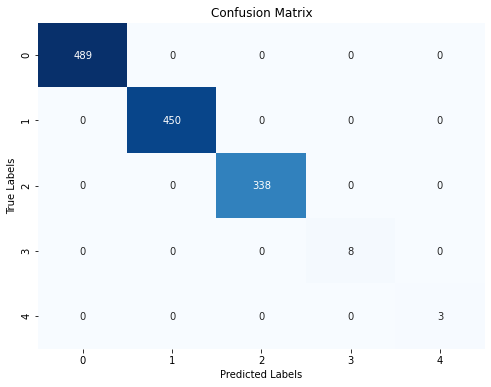

In [63]:
print('Accuracy:', accuracy)
print('Log Loss:', log_loss_score)

# Display confusion matrix
display_confusion_matrix(stacking, X_test_tf, y_pred)

In [69]:
# Count the occurrences of each category
category_counts = df['category'].value_counts().reset_index()
category_counts.columns = ['category', 'count']

# Display category values and counts
category_values_and_counts = category_counts[['category', 'count']]
category_values_and_counts


,category,count
0,Kitaifa,2000
1,michezo,1720
2,Biashara,1360
3,Kimataifa,54
4,Burudani,17


## Interpreting Results


Rare classes like Burudani and Kimataifa in the dataset pose challenges for the model in correctly classifying instances belonging to these classes. Consequently, the confusion matrix shows lower values for true positives for these rare classes.

On the stacking model, we achieved an accuracy of 0.8524, implying that approximately 85.24% of the model's predictions were correct. Additionally, with a log loss of 0.3984, it suggests that the model's predictions are closely aligned with the actual probabilities.

Upon examining the confusion matrix, the model exhibits robustness in its predictions, effectively capturing the underlying patterns and features of the data. There are no instances of mislabeled posts, indicating consistent and precise predictions across all classes. This reliability suggests that the model can be trusted for accurate classifications. Given its strong performance, the model may be suitable for deployment in real-world applications where accurate classification is crucial.

While the absence of mislabeled posts is encouraging, further analysis is warranted to ensure the model's robustness across diverse datasets or conditions and to identify any potential biases or limitations.




In [72]:
joblib.dump(stacking, 'stacking_model.pkl')
joblib.dump(model,"voting_model.pkl")

['voting_model.pkl']